 # **Abandono Escolar en Nivel Secundario - Tierra del Fuego**
---


# 1. **INTRODUCCIÓN**


Este proyecto busca predecir la evolución del abandono escolar en nivel secundario  en la provincia de Tierra del Fuego. Se parte de datos históricos que incluyen:
- Matrícula total
- Porcentaje de repitencia
- Porcentaje de sobreedad
- Porcentaje de promoción
- Porcentaje de abandono escolar

Se entrenan modelos de regresión (Random Forest y Regresion lineal) para proyectar estos indicadores entre los años 2022 y 2026.

<div style="border-left: 4px solid #cccccc; padding-left: 12px; margin-top: 10px;">

  <h3 style="color: darkcyan;">Objetivo del Proyecto</h3>
  <p style="color: dimgray;">
    Este trabajo busca predecir el abandono escolar en la educación secundaria en Tierra del Fuego, utilizando técnicas de Aprendizaje Automático aplicadas sobre datos históricos oficiales.
  </p>

  <h3 style="color: darkcyan;">Contexto y Motivación</h3>
  <p style="color: dimgray;">
    Tierra del Fuego presenta desafíos estructurales en su sistema educativo debido a factores geográficos, demográficos y sociales. Este análisis busca anticipar situaciones de riesgo para implementar medidas preventivas más eficaces.
  </p>

</div>




# 2. **CARGA DE LIBRERÍAS Y CONFIGURACIÓN**

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from matplotlib.colors import Normalize
import matplotlib.cm as cm


sns.set(style="whitegrid")

# 3. **ADQUISICIÓN DE DATOS**


Definimos la ruta base donde se encuentran los dataset a utilizar, luego cargamos cada uno de ellos en una variable.
<div style="border-left: 4px solid #cccccc; padding-left: 12px; margin-top: 10px;">

  <h3 style="color: darkcyan;">Origen de los datos</h3>
  <p style="color: dimgray;">
    Los datos utilizados fueron obtenidos de archivos oficiales provistos por el IPIEC (Instituto Provincial de Evaluación e Investigación Educativa) de Tierra del Fuego. Los archivos incluyen información sobre matrícula, repitencia, sobreedad, promoción efectiva y abandono escolar, organizados por año, sector y nivel educativo.
  </p>

  <h3 style="color: darkcyan;">Primera inspección</h3>
  <p style="color: dimgray;">
    Se revisan las dimensiones, nombres de columnas y valores únicos en las principales variables. Esta exploración inicial permite detectar inconsistencias y preparar el terreno para el análisis exploratorio posterior.
  </p>

</div>


In [93]:
#Ruta base local
base_path = r'C:/Users/maric/OneDrive/Documentos/Aprendizaje automático/Docs abandono escolar/DATA/'


# 1. Dataset de PROMOCIÓN, SOBREEDAD y ABANDONO
promocion_path = base_path + '04_01_06-Secundario-comun.-Promocion-efectiva-sobreedad-y-abandono-interanual-por-ano-de-estudio.-TDF.xlsx'
promocion_df = pd.read_excel(promocion_path)

# 2. Dataset de MATRÍCULA
matricula_path = base_path + '04-1-09-Secundario-comun.-Matricula-por-sector-de-gestion-ano-de-estudio-y-departamento.-TDF-USH-RGA-y-AA.xlsx'
matricula_df = pd.read_excel(matricula_path)

# 3. Dataset de REPITENTES
repitentes_path = base_path + '04-1-10-Secundario-comun.-Repitentes-por-sector-de-gestion-y-ano-de-estudio.-2008-2021.xlsx'
repitentes_df = pd.read_excel(repitentes_path, skiprows=6)

# Confirmación de carga
print("✔️ Datos cargados correctamente")
print("promocion_df →", promocion_df.shape)
print("matricula_df →", matricula_df.shape)
print("repitentes_df →", repitentes_df.shape)



✔️ Datos cargados correctamente
promocion_df → (9, 1)
matricula_df → (38, 18)
repitentes_df → (22, 27)


# 4. **EXPLORACIÓN Y PREPARACIÓN DE DATOS**

<div style="border-left: 4px solid #cccccc; padding-left: 12px; margin-top: 10px;">

  <h3 style="color: darkcyan;">Limpieza y unificación de datos</h3>
  <p style="color: dimgray;">
    Se eliminan columnas y filas vacías, se renombran variables, y se ajustan formatos para facilitar la integración entre los distintos datasets (matrícula, repitencia, abandono, promoción y sobreedad). Se crean nuevas columnas cuando es necesario y se filtran datos de jurisdicciones no relevantes.
  </p>


In [96]:
#Vista preliminar de las primeras 10 filas del dataset de repitentes
repitentes_df.head(10)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,2008,14.61,18.86,2.50,NaN,18.19,18.77,15.88,16.20,9.24,...,9.63,0.30,NaN,14.92,20.78,18.54,14.83,16.30,8.90,0.00
1,2009,13.38,16.81,3.46,NaN,18.63,17.73,15.11,10.57,8.06,...,9.74,0.28,NaN,14.74,21.50,18.94,17.40,11.45,6.67,0.99
2,2010,13.76,17.51,3.16,NaN,18.52,19.49,13.43,13.03,8.70,...,12.01,0.70,NaN,12.33,18.61,18.59,11.86,8.54,5.59,0.46
3,2011,14.33,19.28,1.38,NaN,19.39,22.02,13.79,13.15,7.05,...,5.49,1.51,NaN,14.68,20.17,21.59,14.74,12.08,8.53,0.23
4,2012,10,13.1,2.19,NaN,13.47,16.11,9.84,7.73,5.46,...,4.43,0.12,NaN,9.88,13.73,14.60,10.32,5.97,6.36,0.85
5,2013,10.45,13.53,2.47,NaN,10.02,17.18,14.23,7.57,6.12,...,4.67,1.08,NaN,10.83,9.87,17.45,14.01,7.95,7.43,3.06
6,2014,9.71,12.72,1.81,NaN,12.13,16.04,10.73,8.76,4.84,...,6.34,0.00,NaN,9.57,11.72,16.05,11.88,7.34,3.60,0.00
7,2015,7.81,10.37,1.06,NaN,8.44,12.53,8.82,7.22,6.15,...,5.75,0.00,NaN,7.55,7.39,11.38,9.37,7.07,6.47,0.09
8,2016,7.74,10.27,1.17,NaN,7.59,12.03,9.17,8.09,5.54,...,5.13,0.23,NaN,8.02,8.03,12.51,9.45,7.60,5.87,0.95
9,2017,7.16,9.51,0.73,NaN,6.18,11.04,8.65,8.10,5.65,...,7.85,0.73,NaN,6.27,5.44,9.79,8.16,7.24,3.87,0.63


**Limpieza inicial: eliminación de filas y columnas vacías, reordenación de índices, renombrado y conversión de datos.**

In [98]:
# Eliminar columnas completamente vacías
repitentes_df = repitentes_df.dropna(axis=1, how='all')

# Eliminar filas completamente vacías (muy útil si al final hay NaNs)
repitentes_df = repitentes_df.dropna(axis=0, how='all')

# Reiniciar índice para orden
repitentes_df.reset_index(drop=True, inplace=True)

#Visualizar DF
repitentes_df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,2008,14.61,18.86,2.50,18.19,18.77,15.88,16.20,9.24,0.13,...,16.07,9.63,0.30,14.92,20.78,18.54,14.83,16.30,8.90,0.00
1,2009,13.38,16.81,3.46,18.63,17.73,15.11,10.57,8.06,0.65,...,9.52,9.74,0.28,14.74,21.50,18.94,17.40,11.45,6.67,0.99
2,2010,13.76,17.51,3.16,18.52,19.49,13.43,13.03,8.70,0.57,...,17.69,12.01,0.70,12.33,18.61,18.59,11.86,8.54,5.59,0.46
3,2011,14.33,19.28,1.38,19.39,22.02,13.79,13.15,7.05,0.81,...,14.27,5.49,1.51,14.68,20.17,21.59,14.74,12.08,8.53,0.23
4,2012,10,13.1,2.19,13.47,16.11,9.84,7.73,5.46,0.49,...,9.60,4.43,0.12,9.88,13.73,14.60,10.32,5.97,6.36,0.85


In [99]:
# Verificar la cantidad de filas y columnas del dataset
repitentes_df.shape


(19, 24)

In [100]:
# Listar los nombres actuales de las columnas
repitentes_df.columns.tolist()

['Unnamed: 0',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26']

In [101]:
# Revisar tipos de datos y nulos en repitentes_df
repitentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   19 non-null     object 
 1   Unnamed: 1   14 non-null     object 
 2   Unnamed: 2   14 non-null     object 
 3   Unnamed: 3   14 non-null     float64
 4   Unnamed: 5   14 non-null     object 
 5   Unnamed: 6   14 non-null     float64
 6   Unnamed: 7   14 non-null     float64
 7   Unnamed: 8   14 non-null     float64
 8   Unnamed: 9   14 non-null     float64
 9   Unnamed: 10  14 non-null     float64
 10  Unnamed: 12  14 non-null     object 
 11  Unnamed: 13  14 non-null     float64
 12  Unnamed: 14  14 non-null     float64
 13  Unnamed: 15  14 non-null     float64
 14  Unnamed: 16  14 non-null     float64
 15  Unnamed: 17  14 non-null     float64
 16  Unnamed: 18  14 non-null     float64
 17  Unnamed: 20  14 non-null     float64
 18  Unnamed: 21  14 non-null     float64
 19  Unnamed: 2

In [102]:
# Renombrar columnas según la estructura de la imagen
repitentes_df.columns = [
    "Año",
    "Porc_Total",
    "Porc_Estatal",
    "Porc_Privado",
    "1º Año",
    "2º Año",
    "3º Año",
    "4º Año",
    "5º Año",
    "6º Año",
    "Ush_Total",
    "1º Año USH",
    "2º Año USH",
    "3º Año USH ",
    "4º Año USH",
    "5º Año USH",
    "6º Año USH",
    "RG_Total",
    "1º Año RG ",
    "2º Año RG",
    "3º Año RG",
    "4º Año RG",
    "5º Año RG",
    "6º Año RG"
]

# Convertir todas las columnas (menos Año) a numérico
for col in repitentes_df.columns:
    if col != "Año":
        repitentes_df[col] = pd.to_numeric(repitentes_df[col], errors='coerce')

# Mostrar primeras filas
from IPython.display import display, HTML

display(HTML("<h2 style='color: darkblue;'>✔️ Dataframe limpio de repitentes</h2>"))
repitentes_df.head()



,Año,Porc_Total,Porc_Estatal,Porc_Privado,1º Año,2º Año,3º Año,4º Año,5º Año,6º Año,...,4º Año USH,5º Año USH,6º Año USH,RG_Total,1º Año RG,2º Año RG,3º Año RG,4º Año RG,5º Año RG,6º Año RG
0,2008,14.61,18.86,2.50,18.19,18.77,15.88,16.20,9.24,0.13,...,16.07,9.63,0.30,14.92,20.78,18.54,14.83,16.30,8.90,0.00
1,2009,13.38,16.81,3.46,18.63,17.73,15.11,10.57,8.06,0.65,...,9.52,9.74,0.28,14.74,21.50,18.94,17.40,11.45,6.67,0.99
2,2010,13.76,17.51,3.16,18.52,19.49,13.43,13.03,8.70,0.57,...,17.69,12.01,0.70,12.33,18.61,18.59,11.86,8.54,5.59,0.46
3,2011,14.33,19.28,1.38,19.39,22.02,13.79,13.15,7.05,0.81,...,14.27,5.49,1.51,14.68,20.17,21.59,14.74,12.08,8.53,0.23
4,2012,10.00,13.10,2.19,13.47,16.11,9.84,7.73,5.46,0.49,...,9.60,4.43,0.12,9.88,13.73,14.60,10.32,5.97,6.36,0.85


In [103]:
# Revisar cantidad y nombres de columnas en matricula_df
print(len(matricula_df.columns))
matricula_df.columns.tolist()


18


['Secundario común. Matrícula por sector de gestión, año de estudio y departamento. Departamentos Ushuaia, Río Grande y Antártida Argentina, provincia de Tierra del Fuego AeIAS. Años 2000-2022',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17']

In [104]:
#Eliminar columnas y filas completamente vacías o irrelevantes
matricula_df = matricula_df.dropna(axis=1, how='all')
matricula_df = matricula_df.dropna(axis=0, how='all')
matricula_df = matricula_df.loc[:, ~matricula_df.isin(["…", ".", ""]).all()]
# Resetear el índice
matricula_df.reset_index(drop=True, inplace=True)

# Confirmar cantidad de filas reales
print(f"✔️ Filas válidas: {matricula_df.shape[0]}")
display(matricula_df.tail())

matricula_df.head(30)

✔️ Filas válidas: 33


,"Secundario común. Matrícula por sector de gestión, año de estudio y departamento. Departamentos Ushuaia, Río Grande y Antártida Argentina, provincia de Tierra del Fuego AeIAS. Años 2000-2022",Unnamed: 1,Unnamed: 3,Unnamed: 4,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
28,- Cero absoluto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,… Dato no disponible a la fecha de presentació...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,. Dato no registrado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Nota: La información se presenta en función de...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Fuente: Ministerio de Educación y Cultura de l...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,"Secundario común. Matrícula por sector de gestión, año de estudio y departamento. Departamentos Ushuaia, Río Grande y Antártida Argentina, provincia de Tierra del Fuego AeIAS. Años 2000-2022",Unnamed: 1,Unnamed: 3,Unnamed: 4,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Año,Matrícula del nivel secundario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Matrícula,Sector de gestión,NaN,Año de estudio,NaN,NaN,NaN,NaN,NaN,NaN,Departamento,NaN,NaN,NaN
2,NaN,NaN,Estatal,Privado,1,2.0,3.0,4.0,5.0,6.0,7.0,Ushuaia,Río Grande (1),Tolhuin (1),Antártida Argentina
3,2000,10593,7555,3038,2131,2038.0,1976.0,1847.0,1377.0,1224.0,0.0,…,…,.,…
4,2001,12357,9191,3166,2760,2447.0,2157.0,1919.0,1648.0,1235.0,191.0,…,…,.,…
5,2002,13115,9996,3119,3056,2774.0,2207.0,1847.0,1617.0,1384.0,230.0,…,…,.,…
6,2003,13276,10094,3182,2926,2907.0,2468.0,1997.0,1599.0,1379.0,0.0,…,…,.,…
7,2004,13553,10247,3306,2780,2974.0,2692.0,1984.0,1769.0,1354.0,0.0,…,…,.,…
8,2005,13980,10551,3429,2910,2986.0,2857.0,2083.0,1737.0,1407.0,0.0,…,…,.,…
9,2006,14281,10707,3574,3123,2942.0,2836.0,2189.0,1796.0,1395.0,0.0,…,…,.,…


In [105]:
# Renombrar columnas útiles (15 visibles)
matricula_df.columns = [
    "Año",
    "Mat_Total",
    "Mat_Estatal",
    "Mat_Privado",
    "1º Año",
    "2º Año",
    "3º Año",
    "4º Año",
    "5º Año",
    "6º Año",
    "7º Año",
    "Ushuaia",
    "RG",
    "Tolhuin",
    "Antartida"
]
# Limpiar columna "Año"
matricula_df["Año"] = (
    matricula_df["Año"]
    .astype(str)
    .str.replace(r"\s+", "", regex=True)
    .str.replace(u"\xa0", "", regex=False)
    .str.strip()
)

# Filtrar solo filas con años válidos (exactamente 4 dígitos y numéricos)
matricula_df = matricula_df[matricula_df["Año"].str.match(r"^\d{4}$")]
matricula_df["Año"] = matricula_df["Año"].astype(int)
matricula_df = matricula_df[matricula_df["Año"].between(2000, 2022)]

# Eliminar columnas Antártida y Tolhuin si existen
matricula_df = matricula_df.drop(columns=["Tolhuin", "Antartida"], errors="ignore")

# Reiniciar índice
matricula_df.reset_index(drop=True, inplace=True)

# Confirmación
print(matricula_df["Año"].unique())
print("✔️ Filas válidas:", matricula_df.shape[0])
display(matricula_df.tail())


# Mostrar resultado final
display(HTML("<h2 style='color: darkblue;'>✔️ Dataframe limpio de matrícula</h2>"))
matricula_df.head(30)



[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022]
✔️ Filas válidas: 23


,Año,Mat_Total,Mat_Estatal,Mat_Privado,1º Año,2º Año,3º Año,4º Año,5º Año,6º Año,7º Año,Ushuaia,RG
18,2018,17096,12389,4707,3162,3298.0,3072.0,2738.0,2401.0,2165.0,260.0,7192,9904
19,2019,17251,12707,4544,3018,3230.0,3078.0,2908.0,2512.0,2225.0,280.0,7221,10030
20,2020,17685,13148,4537,3095,3160.0,3126.0,2930.0,2750.0,2329.0,295.0,7374,10311
21,2021,18139,13550,4589,3015,3071.0,3098.0,3100.0,2856.0,2681.0,318.0,7422,10717
22,2022,18045,13418,4627,3015,3125.0,2991.0,3031.0,2923.0,2607.0,353.0,7393,9996


,Año,Mat_Total,Mat_Estatal,Mat_Privado,1º Año,2º Año,3º Año,4º Año,5º Año,6º Año,7º Año,Ushuaia,RG
0,2000,10593,7555,3038,2131,2038.0,1976.0,1847.0,1377.0,1224.0,0.0,…,…
1,2001,12357,9191,3166,2760,2447.0,2157.0,1919.0,1648.0,1235.0,191.0,…,…
2,2002,13115,9996,3119,3056,2774.0,2207.0,1847.0,1617.0,1384.0,230.0,…,…
3,2003,13276,10094,3182,2926,2907.0,2468.0,1997.0,1599.0,1379.0,0.0,…,…
4,2004,13553,10247,3306,2780,2974.0,2692.0,1984.0,1769.0,1354.0,0.0,…,…
5,2005,13980,10551,3429,2910,2986.0,2857.0,2083.0,1737.0,1407.0,0.0,…,…
6,2006,14281,10707,3574,3123,2942.0,2836.0,2189.0,1796.0,1395.0,0.0,…,…
7,2007,14383,10628,3755,3184,3044.0,2598.0,2226.0,1849.0,1482.0,0.0,…,…
8,2008,14762,10925,3837,3392,3111.0,2544.0,2321.0,1872.0,1522.0,0.0,…,…
9,2009,14996,11149,3847,3366,3176.0,2680.0,2385.0,1862.0,1527.0,0.0,6920,8076


In [106]:
# Cargar hoja de promoción efectiva y sobreedad
cuadro1_df = pd.read_excel(
    base_path + '04_01_06-Secundario-comun.-Promocion-efectiva-sobreedad-y-abandono-interanual-por-ano-de-estudio.-TDF.xlsx',
    sheet_name='cuadro 1',
    skiprows=4  # si ves texto antes, podés ajustar este número
)

# Cargar hoja de abandono interanual
cuadro2_df = pd.read_excel(
    base_path + '04_01_06-Secundario-comun.-Promocion-efectiva-sobreedad-y-abandono-interanual-por-ano-de-estudio.-TDF.xlsx',
    sheet_name='cuadro 2',
    skiprows=4
)

# Mostrar primeros datos
print("📊 Cuadro 1: Promoción efectiva y sobreedad")
display(cuadro1_df.head(10))

print("\n📊 Cuadro 2: Abandono interanual")
display(cuadro2_df.head(10))


📊 Cuadro 1: Promoción efectiva y sobreedad


,Unnamed: 0,%,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,%.1,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,76.531707,76.436607,73.996114,76.335312,76.531493,82.243953,71.275253,NaN,41.064486,38.917604,44.170984,45.178042,41.932701,38.291302,34.595960
2,2011,77.000335,76.303466,73.106547,77.635059,78.420835,83.58209,70.379589,NaN,31.302524,30.765886,33.346049,33.388242,32.527260,27.475370,27.482014
3,2012,82.157595,84.137319,77.699681,84.71434,82.324059,88.938053,74.404398,NaN,28.470718,26.849625,30.909618,30.325404,29.774655,27.263603,23.821734
4,2013,82.612572,85.623487,75.410816,82.986627,85.153019,90.438059,75.233902,NaN,40.481498,37.590799,40.603526,44.427935,43.341605,41.921809,34.177215
5,2014,80.939055,85.565382,76.733255,81.320949,83.095723,89.675651,67.891782,NaN,37.947761,31.522426,40.775558,41.726866,39.959267,37.322979,35.987749
6,2015,84.067881,90.164443,82.273425,79.274966,84.35559,90.074557,70.657157,NaN,33.200721,27.241700,34.685100,35.807114,36.335404,34.575955,31.023943
7,2016,84.30197,91.822139,81.483715,82.759796,83.896696,88.927336,73.991727,NaN,31.157470,24.502488,32.629674,32.333901,33.308014,33.564014,32.109617
8,2017,86.38683,94.69599,83.979714,84.954561,85.881908,92.041078,74.17795,NaN,30.354756,23.285899,33.949881,33.086503,31.680545,30.851519,28.916828
9,2018,87.396056,93.295383,87.628866,89.550781,87.289993,92.044981,70.34642,NaN,26.146353,18.342821,26.440267,29.817708,28.889701,27.530196,26.882217



📊 Cuadro 2: Abandono interanual


,Unnamed: 0,%,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010/2011,9.706395,5.047127,6.509067,10.237389,10.440035,9.058157,28.156566
2,2011/2012,8.670907,4.308461,4.878049,8.575746,8.433237,9.366958,28.811450
3,2012/2013,7.840440,2.397159,6.198083,5.448354,9.942717,5.604720,25.106903
4,2013/2014,6.935864,4.358354,7.409621,2.786033,7.278743,3.438530,22.619703
5,2014/2015,9.340796,2.305749,7.226792,7.946336,8.146640,5.481955,32.108218
6,2015/2016,8.062411,1.365188,5.130568,11.935705,8.423913,3.448276,29.291900
7,2016/2017,7.959134,0.590796,6.483715,8.074957,8.013673,5.536332,25.387797
8,2017/2018,6.457296,-0.873221,4.982100,6.395153,6.018168,2.310655,25.145068
9,2018/2019,7.151342,1.771031,3.881140,4.329427,6.975895,2.873803,28.960739


In [107]:
# Eliminar la primera fila vacía de ambos cuadros
cuadro1_df = cuadro1_df.drop(index=0).reset_index(drop=True)
cuadro2_df = cuadro2_df.drop(index=0).reset_index(drop=True)

In [108]:
# Eliminar columna extra en cuadro1 que aparece vacía (por verificación visual)
cuadro1_df.drop(cuadro1_df.columns[8], axis=1, inplace=True)
display(cuadro1_df.head(10))

,Unnamed: 0,%,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,%.1,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2010,76.531707,76.436607,73.996114,76.335312,76.531493,82.243953,71.275253,41.064486,38.917604,44.170984,45.178042,41.932701,38.291302,34.595960
1,2011,77.000335,76.303466,73.106547,77.635059,78.420835,83.58209,70.379589,31.302524,30.765886,33.346049,33.388242,32.527260,27.475370,27.482014
2,2012,82.157595,84.137319,77.699681,84.71434,82.324059,88.938053,74.404398,28.470718,26.849625,30.909618,30.325404,29.774655,27.263603,23.821734
3,2013,82.612572,85.623487,75.410816,82.986627,85.153019,90.438059,75.233902,40.481498,37.590799,40.603526,44.427935,43.341605,41.921809,34.177215
4,2014,80.939055,85.565382,76.733255,81.320949,83.095723,89.675651,67.891782,37.947761,31.522426,40.775558,41.726866,39.959267,37.322979,35.987749
5,2015,84.067881,90.164443,82.273425,79.274966,84.35559,90.074557,70.657157,33.200721,27.241700,34.685100,35.807114,36.335404,34.575955,31.023943
6,2016,84.30197,91.822139,81.483715,82.759796,83.896696,88.927336,73.991727,31.157470,24.502488,32.629674,32.333901,33.308014,33.564014,32.109617
7,2017,86.38683,94.69599,83.979714,84.954561,85.881908,92.041078,74.17795,30.354756,23.285899,33.949881,33.086503,31.680545,30.851519,28.916828
8,2018,87.396056,93.295383,87.628866,89.550781,87.289993,92.044981,70.34642,26.146353,18.342821,26.440267,29.817708,28.889701,27.530196,26.882217
9,2019,88.5,95.63,89.04,88.24,88.1,91.64,75.37,23.920000,14.610000,22.450000,26.580000,28.950000,27.670000,24.180000


In [109]:
#Dividimos el cuadro 1 en dos partes para obtener los df de promoción y sobreedad.
# Parte A: Promoción efectiva (columnas 0 a 8 excluyendo las vacías si ya las borraste)
promocion_df_clean = cuadro1_df.iloc[:, 0:8].copy()
display(promocion_df_clean.head())
# Parte B: Sobreedad (columnas desde la columna 8 en adelante)
sobreedad_df_clean = cuadro1_df.iloc[:, 8:].copy()
display(sobreedad_df_clean.head())

,Unnamed: 0,%,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2010,76.531707,76.436607,73.996114,76.335312,76.531493,82.243953,71.275253
1,2011,77.000335,76.303466,73.106547,77.635059,78.420835,83.58209,70.379589
2,2012,82.157595,84.137319,77.699681,84.71434,82.324059,88.938053,74.404398
3,2013,82.612572,85.623487,75.410816,82.986627,85.153019,90.438059,75.233902
4,2014,80.939055,85.565382,76.733255,81.320949,83.095723,89.675651,67.891782


,%.1,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,41.064486,38.917604,44.170984,45.178042,41.932701,38.291302,34.595960
1,31.302524,30.765886,33.346049,33.388242,32.527260,27.475370,27.482014
2,28.470718,26.849625,30.909618,30.325404,29.774655,27.263603,23.821734
3,40.481498,37.590799,40.603526,44.427935,43.341605,41.921809,34.177215
4,37.947761,31.522426,40.775558,41.726866,39.959267,37.322979,35.987749


In [110]:
# Copiar la columna 'Año' desde promoción
sobreedad_df_clean.insert(0, "Año", promocion_df_clean["Unnamed: 0"].values)
display(sobreedad_df_clean.head())

,Año,%.1,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2010,41.064486,38.917604,44.170984,45.178042,41.932701,38.291302,34.595960
1,2011,31.302524,30.765886,33.346049,33.388242,32.527260,27.475370,27.482014
2,2012,28.470718,26.849625,30.909618,30.325404,29.774655,27.263603,23.821734
3,2013,40.481498,37.590799,40.603526,44.427935,43.341605,41.921809,34.177215
4,2014,37.947761,31.522426,40.775558,41.726866,39.959267,37.322979,35.987749


In [111]:
# Renombrado de columnas y eliminación de  de filas irrelevantes para promoción
promocion_df_clean.columns = [
    "Año",
    "Porc_Total",
    "1° Año",
    "2° Año",
    "3° Año",
    "4° Año",
    "5° Año",
    "6° Año"
]

promocion_df_clean = promocion_df_clean.drop(index=[11,12, 13, 14, 15, 16])
promocion_df_clean.head(20)

,Año,Porc_Total,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año
0,2010,76.531707,76.436607,73.996114,76.335312,76.531493,82.243953,71.275253
1,2011,77.000335,76.303466,73.106547,77.635059,78.420835,83.58209,70.379589
2,2012,82.157595,84.137319,77.699681,84.71434,82.324059,88.938053,74.404398
3,2013,82.612572,85.623487,75.410816,82.986627,85.153019,90.438059,75.233902
4,2014,80.939055,85.565382,76.733255,81.320949,83.095723,89.675651,67.891782
5,2015,84.067881,90.164443,82.273425,79.274966,84.35559,90.074557,70.657157
6,2016,84.30197,91.822139,81.483715,82.759796,83.896696,88.927336,73.991727
7,2017,86.38683,94.69599,83.979714,84.954561,85.881908,92.041078,74.17795
8,2018,87.396056,93.295383,87.628866,89.550781,87.289993,92.044981,70.34642
9,2019,88.5,95.63,89.04,88.24,88.1,91.64,75.37


In [112]:
#Renombrado de columnas y eliminación de  de filas irrelevantes para sobreedad
sobreedad_df_clean.columns = [
    "Año",
    "Porc_Total",
    "1° Año",
    "2° Año",
    "3° Año",
    "4° Año",
    "5° Año",
    "6° Año"
]
sobreedad_df_clean.head()

,Año,Porc_Total,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año
0,2010,41.064486,38.917604,44.170984,45.178042,41.932701,38.291302,34.595960
1,2011,31.302524,30.765886,33.346049,33.388242,32.527260,27.475370,27.482014
2,2012,28.470718,26.849625,30.909618,30.325404,29.774655,27.263603,23.821734
3,2013,40.481498,37.590799,40.603526,44.427935,43.341605,41.921809,34.177215
4,2014,37.947761,31.522426,40.775558,41.726866,39.959267,37.322979,35.987749


In [113]:
# Visualizar las primeras filas del cuadro de abandono interanual
cuadro2_df.head()

,Unnamed: 0,%,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2010/2011,9.706395,5.047127,6.509067,10.237389,10.440035,9.058157,28.156566
1,2011/2012,8.670907,4.308461,4.878049,8.575746,8.433237,9.366958,28.811450
2,2012/2013,7.840440,2.397159,6.198083,5.448354,9.942717,5.604720,25.106903
3,2013/2014,6.935864,4.358354,7.409621,2.786033,7.278743,3.438530,22.619703
4,2014/2015,9.340796,2.305749,7.226792,7.946336,8.146640,5.481955,32.108218


In [114]:
# Renombrar columnas del cuadro de abandono
cuadro2_df.columns = [
    "Año",
    "Porc_Total",
    "1° Año",
    "2° Año",
    "3° Año",
    "4° Año",
    "5° Año",
    "6° Año"
]

In [115]:
# Guardar como abandono_df para estandarizar nombres
abandono_df = cuadro2_df.copy()
abandono_df.head(30)

,Año,Porc_Total,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año
0,2010/2011,9.706395,5.047127,6.509067,10.237389,10.440035,9.058157,28.156566
1,2011/2012,8.670907,4.308461,4.878049,8.575746,8.433237,9.366958,28.811450
2,2012/2013,7.840440,2.397159,6.198083,5.448354,9.942717,5.604720,25.106903
3,2013/2014,6.935864,4.358354,7.409621,2.786033,7.278743,3.438530,22.619703
4,2014/2015,9.340796,2.305749,7.226792,7.946336,8.146640,5.481955,32.108218
5,2015/2016,8.062411,1.365188,5.130568,11.935705,8.423913,3.448276,29.291900
6,2016/2017,7.959134,0.590796,6.483715,8.074957,8.013673,5.536332,25.387797
7,2017/2018,6.457296,-0.873221,4.982100,6.395153,6.018168,2.310655,25.145068
8,2018/2019,7.151342,1.771031,3.881140,4.329427,6.975895,2.873803,28.960739
9,2019/2020,5.550000,-0.660000,3.530000,4.740000,5.160000,1.230000,23.420000


In [116]:
# Eliminar columnas completamente vacías (separadoras visuales)
abandono_df = abandono_df.dropna(axis=1, how='all')

# Reemplazar valores no válidos
abandono_df.replace(["…", ".", "-", "—"], pd.NA, inplace=True)

# Convertir columnas numéricas (excepto Año)
for col in abandono_df.columns:
    if col != "Año":
        abandono_df[col] = pd.to_numeric(abandono_df[col], errors='coerce')

# Redondear a 2 decimales
for col in abandono_df.columns:
    if col != "Año":
        abandono_df[col] = abandono_df[col].round(2)
# Eliminar filas donde todas las columnas (excepto Año) están vacías o no numéricas
abandono_df = abandono_df.dropna(subset=["Porc_Total"], how='any').reset_index(drop=True)

# Verificar resultado
display(abandono_df.head(20))



,Año,Porc_Total,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año
0,2010/2011,9.71,5.05,6.51,10.24,10.44,9.06,28.16
1,2011/2012,8.67,4.31,4.88,8.58,8.43,9.37,28.81
2,2012/2013,7.84,2.40,6.20,5.45,9.94,5.60,25.11
3,2013/2014,6.94,4.36,7.41,2.79,7.28,3.44,22.62
4,2014/2015,9.34,2.31,7.23,7.95,8.15,5.48,32.11
5,2015/2016,8.06,1.37,5.13,11.94,8.42,3.45,29.29
6,2016/2017,7.96,0.59,6.48,8.07,8.01,5.54,25.39
7,2017/2018,6.46,-0.87,4.98,6.40,6.02,2.31,25.15
8,2018/2019,7.15,1.77,3.88,4.33,6.98,2.87,28.96
9,2019/2020,5.55,-0.66,3.53,4.74,5.16,1.23,23.42


In [117]:
# Asegurarse de que todas las columnas "Año" sean string y sin espacios
for df in [promocion_df_clean, sobreedad_df_clean, abandono_df]:
    df["Año"] = df["Año"].astype(str).str.strip()


In [118]:
# Vista general de todos los datasets cargados y limpios

print("📊 Promoción efectiva")
display(promocion_df_clean.head(15))

print("📊 Sobreedad")
display(sobreedad_df_clean.head(15))

print("📊 Abandono interanual")
display(abandono_df.head(15))

print("📊 Repitentes")
display(repitentes_df.head(15))

print("📊 Matrícula")
display(matricula_df.head(15))



📊 Promoción efectiva


,Año,Porc_Total,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año
0,2010,76.531707,76.436607,73.996114,76.335312,76.531493,82.243953,71.275253
1,2011,77.000335,76.303466,73.106547,77.635059,78.420835,83.58209,70.379589
2,2012,82.157595,84.137319,77.699681,84.71434,82.324059,88.938053,74.404398
3,2013,82.612572,85.623487,75.410816,82.986627,85.153019,90.438059,75.233902
4,2014,80.939055,85.565382,76.733255,81.320949,83.095723,89.675651,67.891782
5,2015,84.067881,90.164443,82.273425,79.274966,84.35559,90.074557,70.657157
6,2016,84.30197,91.822139,81.483715,82.759796,83.896696,88.927336,73.991727
7,2017,86.38683,94.69599,83.979714,84.954561,85.881908,92.041078,74.17795
8,2018,87.396056,93.295383,87.628866,89.550781,87.289993,92.044981,70.34642
9,2019,88.5,95.63,89.04,88.24,88.1,91.64,75.37


📊 Sobreedad


,Año,Porc_Total,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año
0,2010,41.064486,38.917604,44.170984,45.178042,41.932701,38.291302,34.595960
1,2011,31.302524,30.765886,33.346049,33.388242,32.527260,27.475370,27.482014
2,2012,28.470718,26.849625,30.909618,30.325404,29.774655,27.263603,23.821734
3,2013,40.481498,37.590799,40.603526,44.427935,43.341605,41.921809,34.177215
4,2014,37.947761,31.522426,40.775558,41.726866,39.959267,37.322979,35.987749
5,2015,33.200721,27.241700,34.685100,35.807114,36.335404,34.575955,31.023943
6,2016,31.157470,24.502488,32.629674,32.333901,33.308014,33.564014,32.109617
7,2017,30.354756,23.285899,33.949881,33.086503,31.680545,30.851519,28.916828
8,2018,26.146353,18.342821,26.440267,29.817708,28.889701,27.530196,26.882217
9,2019,23.920000,14.610000,22.450000,26.580000,28.950000,27.670000,24.180000


📊 Abandono interanual


,Año,Porc_Total,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año
0,2010/2011,9.71,5.05,6.51,10.24,10.44,9.06,28.16
1,2011/2012,8.67,4.31,4.88,8.58,8.43,9.37,28.81
2,2012/2013,7.84,2.40,6.20,5.45,9.94,5.60,25.11
3,2013/2014,6.94,4.36,7.41,2.79,7.28,3.44,22.62
4,2014/2015,9.34,2.31,7.23,7.95,8.15,5.48,32.11
5,2015/2016,8.06,1.37,5.13,11.94,8.42,3.45,29.29
6,2016/2017,7.96,0.59,6.48,8.07,8.01,5.54,25.39
7,2017/2018,6.46,-0.87,4.98,6.40,6.02,2.31,25.15
8,2018/2019,7.15,1.77,3.88,4.33,6.98,2.87,28.96
9,2019/2020,5.55,-0.66,3.53,4.74,5.16,1.23,23.42


📊 Repitentes


,Año,Porc_Total,Porc_Estatal,Porc_Privado,1º Año,2º Año,3º Año,4º Año,5º Año,6º Año,...,4º Año USH,5º Año USH,6º Año USH,RG_Total,1º Año RG,2º Año RG,3º Año RG,4º Año RG,5º Año RG,6º Año RG
0,2008,14.61,18.86,2.50,18.19,18.77,15.88,16.20,9.24,0.13,...,16.07,9.63,0.30,14.92,20.78,18.54,14.83,16.30,8.90,0.00
1,2009,13.38,16.81,3.46,18.63,17.73,15.11,10.57,8.06,0.65,...,9.52,9.74,0.28,14.74,21.50,18.94,17.40,11.45,6.67,0.99
2,2010,13.76,17.51,3.16,18.52,19.49,13.43,13.03,8.70,0.57,...,17.69,12.01,0.70,12.33,18.61,18.59,11.86,8.54,5.59,0.46
3,2011,14.33,19.28,1.38,19.39,22.02,13.79,13.15,7.05,0.81,...,14.27,5.49,1.51,14.68,20.17,21.59,14.74,12.08,8.53,0.23
4,2012,10.00,13.10,2.19,13.47,16.11,9.84,7.73,5.46,0.49,...,9.60,4.43,0.12,9.88,13.73,14.60,10.32,5.97,6.36,0.85
5,2013,10.45,13.53,2.47,10.02,17.18,14.23,7.57,6.12,2.15,...,7.12,4.67,1.08,10.83,9.87,17.45,14.01,7.95,7.43,3.06
6,2014,9.71,12.72,1.81,12.13,16.04,10.73,8.76,4.84,0.00,...,10.57,6.34,0.00,9.57,11.72,16.05,11.88,7.34,3.60,0.00
7,2015,7.81,10.37,1.06,8.44,12.53,8.82,7.22,6.15,0.05,...,7.41,5.75,0.00,7.55,7.39,11.38,9.37,7.07,6.47,0.09
8,2016,7.74,10.27,1.17,7.59,12.03,9.17,8.09,5.54,0.62,...,8.70,5.13,0.23,8.02,8.03,12.51,9.45,7.60,5.87,0.95
9,2017,7.16,9.51,0.73,6.18,11.04,8.65,8.10,5.65,0.68,...,9.21,7.85,0.73,6.27,5.44,9.79,8.16,7.24,3.87,0.63


📊 Matrícula


,Año,Mat_Total,Mat_Estatal,Mat_Privado,1º Año,2º Año,3º Año,4º Año,5º Año,6º Año,7º Año,Ushuaia,RG
0,2000,10593,7555,3038,2131,2038.0,1976.0,1847.0,1377.0,1224.0,0.0,…,…
1,2001,12357,9191,3166,2760,2447.0,2157.0,1919.0,1648.0,1235.0,191.0,…,…
2,2002,13115,9996,3119,3056,2774.0,2207.0,1847.0,1617.0,1384.0,230.0,…,…
3,2003,13276,10094,3182,2926,2907.0,2468.0,1997.0,1599.0,1379.0,0.0,…,…
4,2004,13553,10247,3306,2780,2974.0,2692.0,1984.0,1769.0,1354.0,0.0,…,…
5,2005,13980,10551,3429,2910,2986.0,2857.0,2083.0,1737.0,1407.0,0.0,…,…
6,2006,14281,10707,3574,3123,2942.0,2836.0,2189.0,1796.0,1395.0,0.0,…,…
7,2007,14383,10628,3755,3184,3044.0,2598.0,2226.0,1849.0,1482.0,0.0,…,…
8,2008,14762,10925,3837,3392,3111.0,2544.0,2321.0,1872.0,1522.0,0.0,…,…
9,2009,14996,11149,3847,3366,3176.0,2680.0,2385.0,1862.0,1527.0,0.0,6920,8076


In [119]:
# Función para limpiar y filtrar valores válidos en la columna "Año"
def limpiar_columna_anio(df):
    df = df.copy()
    df["Año"] = (
        df["Año"]
        .astype(str)
        .str.replace(r"\s+", "", regex=True)
        .str.replace(u"\xa0", "", regex=False)
        .str.strip()
    )
    df = df[df["Año"].str.contains(r"^\d{4}/?\d{0,4}$", regex=True)]
    return df.reset_index(drop=True)

promocion_df_clean = limpiar_columna_anio(promocion_df_clean)
sobreedad_df_clean = limpiar_columna_anio(sobreedad_df_clean)
abandono_df = limpiar_columna_anio(abandono_df)
repitentes_df = limpiar_columna_anio(repitentes_df)
matricula_df = limpiar_columna_anio(matricula_df)

# Convertir columna "Año" a entero (extrae los primeros 4 dígitos)
def estandarizar_anio(df, columna="Año"):
    df = df.copy()
    df[columna] = (
        df[columna]
        .astype(str)
        .str.extract(r"(\d{4})") 
        .astype(float)
        .astype("Int64")        
    )
    return df
promocion_df_clean = estandarizar_anio(promocion_df_clean)
sobreedad_df_clean = estandarizar_anio(sobreedad_df_clean)
abandono_df = estandarizar_anio(abandono_df)
repitentes_df = estandarizar_anio(repitentes_df)
matricula_df = estandarizar_anio(matricula_df)



In [120]:
# Vista general de todos los datasets cargados y limpios
print("📊 Promoción efectiva")
display(promocion_df_clean.head(20))

print("📊 Sobreedad")
display(sobreedad_df_clean.head(20))

print("📊 Abandono interanual")
display(abandono_df.head(20))

print("📊 Repitentes")
display(repitentes_df.head(20))

print("📊 Matrícula")
display(matricula_df.head(20))


📊 Promoción efectiva


,Año,Porc_Total,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año
0,2010,76.531707,76.436607,73.996114,76.335312,76.531493,82.243953,71.275253
1,2011,77.000335,76.303466,73.106547,77.635059,78.420835,83.58209,70.379589
2,2012,82.157595,84.137319,77.699681,84.71434,82.324059,88.938053,74.404398
3,2013,82.612572,85.623487,75.410816,82.986627,85.153019,90.438059,75.233902
4,2014,80.939055,85.565382,76.733255,81.320949,83.095723,89.675651,67.891782
5,2015,84.067881,90.164443,82.273425,79.274966,84.35559,90.074557,70.657157
6,2016,84.30197,91.822139,81.483715,82.759796,83.896696,88.927336,73.991727
7,2017,86.38683,94.69599,83.979714,84.954561,85.881908,92.041078,74.17795
8,2018,87.396056,93.295383,87.628866,89.550781,87.289993,92.044981,70.34642
9,2019,88.5,95.63,89.04,88.24,88.1,91.64,75.37


📊 Sobreedad


,Año,Porc_Total,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año
0,2010,41.064486,38.917604,44.170984,45.178042,41.932701,38.291302,34.595960
1,2011,31.302524,30.765886,33.346049,33.388242,32.527260,27.475370,27.482014
2,2012,28.470718,26.849625,30.909618,30.325404,29.774655,27.263603,23.821734
3,2013,40.481498,37.590799,40.603526,44.427935,43.341605,41.921809,34.177215
4,2014,37.947761,31.522426,40.775558,41.726866,39.959267,37.322979,35.987749
5,2015,33.200721,27.241700,34.685100,35.807114,36.335404,34.575955,31.023943
6,2016,31.157470,24.502488,32.629674,32.333901,33.308014,33.564014,32.109617
7,2017,30.354756,23.285899,33.949881,33.086503,31.680545,30.851519,28.916828
8,2018,26.146353,18.342821,26.440267,29.817708,28.889701,27.530196,26.882217
9,2019,23.920000,14.610000,22.450000,26.580000,28.950000,27.670000,24.180000


📊 Abandono interanual


,Año,Porc_Total,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año
0,2010,9.71,5.05,6.51,10.24,10.44,9.06,28.16
1,2011,8.67,4.31,4.88,8.58,8.43,9.37,28.81
2,2012,7.84,2.40,6.20,5.45,9.94,5.60,25.11
3,2013,6.94,4.36,7.41,2.79,7.28,3.44,22.62
4,2014,9.34,2.31,7.23,7.95,8.15,5.48,32.11
5,2015,8.06,1.37,5.13,11.94,8.42,3.45,29.29
6,2016,7.96,0.59,6.48,8.07,8.01,5.54,25.39
7,2017,6.46,-0.87,4.98,6.40,6.02,2.31,25.15
8,2018,7.15,1.77,3.88,4.33,6.98,2.87,28.96
9,2019,5.55,-0.66,3.53,4.74,5.16,1.23,23.42


📊 Repitentes


,Año,Porc_Total,Porc_Estatal,Porc_Privado,1º Año,2º Año,3º Año,4º Año,5º Año,6º Año,...,4º Año USH,5º Año USH,6º Año USH,RG_Total,1º Año RG,2º Año RG,3º Año RG,4º Año RG,5º Año RG,6º Año RG
0,2008,14.61,18.86,2.50,18.19,18.77,15.88,16.20,9.24,0.13,...,16.07,9.63,0.30,14.92,20.78,18.54,14.83,16.30,8.90,0.00
1,2009,13.38,16.81,3.46,18.63,17.73,15.11,10.57,8.06,0.65,...,9.52,9.74,0.28,14.74,21.50,18.94,17.40,11.45,6.67,0.99
2,2010,13.76,17.51,3.16,18.52,19.49,13.43,13.03,8.70,0.57,...,17.69,12.01,0.70,12.33,18.61,18.59,11.86,8.54,5.59,0.46
3,2011,14.33,19.28,1.38,19.39,22.02,13.79,13.15,7.05,0.81,...,14.27,5.49,1.51,14.68,20.17,21.59,14.74,12.08,8.53,0.23
4,2012,10.00,13.10,2.19,13.47,16.11,9.84,7.73,5.46,0.49,...,9.60,4.43,0.12,9.88,13.73,14.60,10.32,5.97,6.36,0.85
5,2013,10.45,13.53,2.47,10.02,17.18,14.23,7.57,6.12,2.15,...,7.12,4.67,1.08,10.83,9.87,17.45,14.01,7.95,7.43,3.06
6,2014,9.71,12.72,1.81,12.13,16.04,10.73,8.76,4.84,0.00,...,10.57,6.34,0.00,9.57,11.72,16.05,11.88,7.34,3.60,0.00
7,2015,7.81,10.37,1.06,8.44,12.53,8.82,7.22,6.15,0.05,...,7.41,5.75,0.00,7.55,7.39,11.38,9.37,7.07,6.47,0.09
8,2016,7.74,10.27,1.17,7.59,12.03,9.17,8.09,5.54,0.62,...,8.70,5.13,0.23,8.02,8.03,12.51,9.45,7.60,5.87,0.95
9,2017,7.16,9.51,0.73,6.18,11.04,8.65,8.10,5.65,0.68,...,9.21,7.85,0.73,6.27,5.44,9.79,8.16,7.24,3.87,0.63


📊 Matrícula


,Año,Mat_Total,Mat_Estatal,Mat_Privado,1º Año,2º Año,3º Año,4º Año,5º Año,6º Año,7º Año,Ushuaia,RG
0,2000,10593,7555,3038,2131,2038.0,1976.0,1847.0,1377.0,1224.0,0.0,…,…
1,2001,12357,9191,3166,2760,2447.0,2157.0,1919.0,1648.0,1235.0,191.0,…,…
2,2002,13115,9996,3119,3056,2774.0,2207.0,1847.0,1617.0,1384.0,230.0,…,…
3,2003,13276,10094,3182,2926,2907.0,2468.0,1997.0,1599.0,1379.0,0.0,…,…
4,2004,13553,10247,3306,2780,2974.0,2692.0,1984.0,1769.0,1354.0,0.0,…,…
5,2005,13980,10551,3429,2910,2986.0,2857.0,2083.0,1737.0,1407.0,0.0,…,…
6,2006,14281,10707,3574,3123,2942.0,2836.0,2189.0,1796.0,1395.0,0.0,…,…
7,2007,14383,10628,3755,3184,3044.0,2598.0,2226.0,1849.0,1482.0,0.0,…,…
8,2008,14762,10925,3837,3392,3111.0,2544.0,2321.0,1872.0,1522.0,0.0,…,…
9,2009,14996,11149,3847,3366,3176.0,2680.0,2385.0,1862.0,1527.0,0.0,6920,8076


<div style="border-left: 4px solid #cccccc; padding-left: 12px; margin-top: 10px;">
  <h3 style="color: darkcyan;">Tratamiento de valores faltantes</h3>
  <p style="color: dimgray;">
    Se identifican y analizan valores nulos o ausentes. Dependiendo del caso, se imputan con técnicas apropiadas (como la media) o se eliminan si representan una proporción muy pequeña del total.
  </p>
</div>




In [122]:
#  Verificar los años disponibles en cada dataset
print("🔎 Años en promoción_df_clean:")
print(promocion_df_clean["Año"].unique())

print("\n🔎 Años en sobreedad_df_clean:")
print(sobreedad_df_clean["Año"].unique())

print("\n🔎 Años en abandono_df:")
print(abandono_df["Año"].unique())

print("\n🔎 Años en matricula_df:")
print(matricula_df["Año"].unique())

print("\n🔎 Años en repitentes_df:")
print(repitentes_df["Año"].unique())

# Convertir a conjuntos
set_prom = set(promocion_df_clean["Año"].dropna())
set_sobre = set(sobreedad_df_clean["Año"].dropna())
set_aband = set(abandono_df["Año"].dropna())
set_matri = set(matricula_df["Año"].dropna())
set_rep = set(repitentes_df["Año"].dropna())

print("📅 Años comunes entre todos los datasets:")
print(set_prom & set_sobre & set_aband & set_matri & set_rep)


# Intersecciones
print("🎯 Años comunes entre los tres:")
print(set_prom & set_sobre & set_aband & set_matri & set_rep)


🔎 Años en promoción_df_clean:
<IntegerArray>
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Length: 11, dtype: Int64

🔎 Años en sobreedad_df_clean:
<IntegerArray>
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Length: 13, dtype: Int64

🔎 Años en abandono_df:
<IntegerArray>
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Length: 12, dtype: Int64

🔎 Años en matricula_df:
<IntegerArray>
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Length: 23, dtype: Int64

🔎 Años en repitentes_df:
<IntegerArray>
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
 2021]
Length: 14, dtype: Int64
📅 Años comunes entre todos los datasets:
{2016, 2017, 2018, 2019, 2020, 2010, 2011, 2012, 2013, 2014, 2015}
🎯 Años comunes entre los tres:
{2016, 2017, 2018, 2019, 2020, 2010, 2011, 2012, 2013, 2014, 2015}


In [123]:
# Función para convertir y redondear columnas (excepto "Año")
def convertir_y_redondear(df):
    df = df.copy()
    for col in df.columns:
        if col != "Año":
            df[col] = pd.to_numeric(df[col], errors='coerce').round(2)
    return df

# Aplicar a los tres DataFrames originales
promocion_df_clean = convertir_y_redondear(promocion_df_clean)
sobreedad_df_clean = convertir_y_redondear(sobreedad_df_clean)
abandono_df = convertir_y_redondear(abandono_df)

# Mostrar para confirmar
print("📘 Promoción efectiva:")
display(promocion_df_clean.head(5))

print("📗 Sobreedad:")
display(sobreedad_df_clean.head(5))

print("📕 Abandono:")
display(abandono_df.head(5))


📘 Promoción efectiva:


,Año,Porc_Total,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año
0,2010,76.53,76.44,74.00,76.34,76.53,82.24,71.28
1,2011,77.00,76.30,73.11,77.64,78.42,83.58,70.38
2,2012,82.16,84.14,77.70,84.71,82.32,88.94,74.40
3,2013,82.61,85.62,75.41,82.99,85.15,90.44,75.23
4,2014,80.94,85.57,76.73,81.32,83.10,89.68,67.89


📗 Sobreedad:


,Año,Porc_Total,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año
0,2010,41.06,38.92,44.17,45.18,41.93,38.29,34.60
1,2011,31.30,30.77,33.35,33.39,32.53,27.48,27.48
2,2012,28.47,26.85,30.91,30.33,29.77,27.26,23.82
3,2013,40.48,37.59,40.60,44.43,43.34,41.92,34.18
4,2014,37.95,31.52,40.78,41.73,39.96,37.32,35.99


📕 Abandono:


,Año,Porc_Total,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año
0,2010,9.71,5.05,6.51,10.24,10.44,9.06,28.16
1,2011,8.67,4.31,4.88,8.58,8.43,9.37,28.81
2,2012,7.84,2.40,6.20,5.45,9.94,5.60,25.11
3,2013,6.94,4.36,7.41,2.79,7.28,3.44,22.62
4,2014,9.34,2.31,7.23,7.95,8.15,5.48,32.11


In [124]:
print("🔎 Años en promoción_df_clean:")
print(promocion_df_clean["Año"].unique())

print("\n🔎 Años en sobreedad_df_clean:")
print(sobreedad_df_clean["Año"].unique())

print("\n🔎 Años en abandono_df:")
print(abandono_df["Año"].unique())
# Convertir a conjuntos
set_prom = set(promocion_df_clean["Año"])
set_sobre = set(sobreedad_df_clean["Año"])
set_aband = set(abandono_df["Año"])

# Intersecciones
print("🎯 Años comunes entre los tres:")
print(set_prom & set_sobre & set_aband)

🔎 Años en promoción_df_clean:
<IntegerArray>
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Length: 11, dtype: Int64

🔎 Años en sobreedad_df_clean:
<IntegerArray>
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Length: 13, dtype: Int64

🔎 Años en abandono_df:
<IntegerArray>
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Length: 12, dtype: Int64
🎯 Años comunes entre los tres:
{2016, 2017, 2018, 2019, 2020, 2010, 2011, 2012, 2013, 2014, 2015}


In [125]:
#Vista rápida de todos los df limpios

print("📊 Promoción efectiva")
display(promocion_df_clean.head(10))

print("📊 Sobreedad")
display(sobreedad_df_clean.head(10))

print("📊 Abandono interanual")
display(abandono_df.head(10))

print("📊 Repitentes")
display(repitentes_df.head(10))

print("📊 Matrícula")
display(matricula_df.head(10))

📊 Promoción efectiva


,Año,Porc_Total,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año
0,2010,76.53,76.44,74.00,76.34,76.53,82.24,71.28
1,2011,77.00,76.30,73.11,77.64,78.42,83.58,70.38
2,2012,82.16,84.14,77.70,84.71,82.32,88.94,74.40
3,2013,82.61,85.62,75.41,82.99,85.15,90.44,75.23
4,2014,80.94,85.57,76.73,81.32,83.10,89.68,67.89
5,2015,84.07,90.16,82.27,79.27,84.36,90.07,70.66
6,2016,84.30,91.82,81.48,82.76,83.90,88.93,73.99
7,2017,86.39,94.70,83.98,84.95,85.88,92.04,74.18
8,2018,87.40,93.30,87.63,89.55,87.29,92.04,70.35
9,2019,88.50,95.63,89.04,88.24,88.10,91.64,75.37


📊 Sobreedad


,Año,Porc_Total,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año
0,2010,41.06,38.92,44.17,45.18,41.93,38.29,34.60
1,2011,31.30,30.77,33.35,33.39,32.53,27.48,27.48
2,2012,28.47,26.85,30.91,30.33,29.77,27.26,23.82
3,2013,40.48,37.59,40.60,44.43,43.34,41.92,34.18
4,2014,37.95,31.52,40.78,41.73,39.96,37.32,35.99
5,2015,33.20,27.24,34.69,35.81,36.34,34.58,31.02
6,2016,31.16,24.50,32.63,32.33,33.31,33.56,32.11
7,2017,30.35,23.29,33.95,33.09,31.68,30.85,28.92
8,2018,26.15,18.34,26.44,29.82,28.89,27.53,26.88
9,2019,23.92,14.61,22.45,26.58,28.95,27.67,24.18


📊 Abandono interanual


,Año,Porc_Total,1° Año,2° Año,3° Año,4° Año,5° Año,6° Año
0,2010,9.71,5.05,6.51,10.24,10.44,9.06,28.16
1,2011,8.67,4.31,4.88,8.58,8.43,9.37,28.81
2,2012,7.84,2.40,6.20,5.45,9.94,5.60,25.11
3,2013,6.94,4.36,7.41,2.79,7.28,3.44,22.62
4,2014,9.34,2.31,7.23,7.95,8.15,5.48,32.11
5,2015,8.06,1.37,5.13,11.94,8.42,3.45,29.29
6,2016,7.96,0.59,6.48,8.07,8.01,5.54,25.39
7,2017,6.46,-0.87,4.98,6.40,6.02,2.31,25.15
8,2018,7.15,1.77,3.88,4.33,6.98,2.87,28.96
9,2019,5.55,-0.66,3.53,4.74,5.16,1.23,23.42


📊 Repitentes


,Año,Porc_Total,Porc_Estatal,Porc_Privado,1º Año,2º Año,3º Año,4º Año,5º Año,6º Año,...,4º Año USH,5º Año USH,6º Año USH,RG_Total,1º Año RG,2º Año RG,3º Año RG,4º Año RG,5º Año RG,6º Año RG
0,2008,14.61,18.86,2.50,18.19,18.77,15.88,16.20,9.24,0.13,...,16.07,9.63,0.30,14.92,20.78,18.54,14.83,16.30,8.90,0.00
1,2009,13.38,16.81,3.46,18.63,17.73,15.11,10.57,8.06,0.65,...,9.52,9.74,0.28,14.74,21.50,18.94,17.40,11.45,6.67,0.99
2,2010,13.76,17.51,3.16,18.52,19.49,13.43,13.03,8.70,0.57,...,17.69,12.01,0.70,12.33,18.61,18.59,11.86,8.54,5.59,0.46
3,2011,14.33,19.28,1.38,19.39,22.02,13.79,13.15,7.05,0.81,...,14.27,5.49,1.51,14.68,20.17,21.59,14.74,12.08,8.53,0.23
4,2012,10.00,13.10,2.19,13.47,16.11,9.84,7.73,5.46,0.49,...,9.60,4.43,0.12,9.88,13.73,14.60,10.32,5.97,6.36,0.85
5,2013,10.45,13.53,2.47,10.02,17.18,14.23,7.57,6.12,2.15,...,7.12,4.67,1.08,10.83,9.87,17.45,14.01,7.95,7.43,3.06
6,2014,9.71,12.72,1.81,12.13,16.04,10.73,8.76,4.84,0.00,...,10.57,6.34,0.00,9.57,11.72,16.05,11.88,7.34,3.60,0.00
7,2015,7.81,10.37,1.06,8.44,12.53,8.82,7.22,6.15,0.05,...,7.41,5.75,0.00,7.55,7.39,11.38,9.37,7.07,6.47,0.09
8,2016,7.74,10.27,1.17,7.59,12.03,9.17,8.09,5.54,0.62,...,8.70,5.13,0.23,8.02,8.03,12.51,9.45,7.60,5.87,0.95
9,2017,7.16,9.51,0.73,6.18,11.04,8.65,8.10,5.65,0.68,...,9.21,7.85,0.73,6.27,5.44,9.79,8.16,7.24,3.87,0.63


📊 Matrícula


,Año,Mat_Total,Mat_Estatal,Mat_Privado,1º Año,2º Año,3º Año,4º Año,5º Año,6º Año,7º Año,Ushuaia,RG
0,2000,10593,7555,3038,2131,2038.0,1976.0,1847.0,1377.0,1224.0,0.0,…,…
1,2001,12357,9191,3166,2760,2447.0,2157.0,1919.0,1648.0,1235.0,191.0,…,…
2,2002,13115,9996,3119,3056,2774.0,2207.0,1847.0,1617.0,1384.0,230.0,…,…
3,2003,13276,10094,3182,2926,2907.0,2468.0,1997.0,1599.0,1379.0,0.0,…,…
4,2004,13553,10247,3306,2780,2974.0,2692.0,1984.0,1769.0,1354.0,0.0,…,…
5,2005,13980,10551,3429,2910,2986.0,2857.0,2083.0,1737.0,1407.0,0.0,…,…
6,2006,14281,10707,3574,3123,2942.0,2836.0,2189.0,1796.0,1395.0,0.0,…,…
7,2007,14383,10628,3755,3184,3044.0,2598.0,2226.0,1849.0,1482.0,0.0,…,…
8,2008,14762,10925,3837,3392,3111.0,2544.0,2321.0,1872.0,1522.0,0.0,…,…
9,2009,14996,11149,3847,3366,3176.0,2680.0,2385.0,1862.0,1527.0,0.0,6920,8076


**Construcción del DataFrame final**

En esta sección se realizan los siguientes pasos:

- **Exportación opcional** de los datasets limpios para respaldo o análisis externo.
- **Verificación de los archivos guardados** en una carpeta local (`data/processed`).
- **Renombrado de columnas** para estandarizar nombres y evitar duplicaciones o ambigüedades.
- **Ajustes específicos** para las columnas de abandono por curso (`1°` a `6° año`), ya que algunos nombres estaban duplicados o mal codificados.

> 🔍 Nota: Aunque se intentó hacer un merge automático usando claves múltiples (`año`, `sector`, `departamento`), este paso no fue necesario ya que los datasets relevantes ya se unificaron posteriormente en `df_clean`.


In [127]:
#Exportación de dataframes al entorno local
import os
os.makedirs("data/processed", exist_ok=True)

# Exportar los DataFrames si están definidos
try:
    promocion_df_clean.to_csv("data/processed/promocion_df.csv", index=False)
    print("✅ promocion_df exportado")
except NameError:
    print("❌ promocion_df no está definido")

try:
    sobreedad_df_clean.to_csv("data/processed/sobreedad_df.csv", index=False)
    print("✅ sobreedad_df exportado")
except NameError:
    print("❌ sobreedad_df no está definido")

try:
    abandono_df.to_csv("data/processed/abandono_df.csv", index=False)
    print("✅ abandono_df exportado")
except NameError:
    print("❌ abandono_df no está definido")

try:
    repitentes_df.to_csv("data/processed/repitentes_df.csv", index=False)
    print("✅ repitentes_df exportado")
except NameError:
    print("❌ repitentes_df no está definido")

try:
    matricula_df.to_csv("data/processed/matricula_df.csv", index=False)
    print("✅ matricula_df exportado")
except NameError:
    print("❌ matricula_df no está definido")

#Verificación de importación 
import os

print("📍 Ruta completa de los archivos:")
for f in os.listdir("data/processed"):
    print(os.path.abspath("data/processed/" + f))

✅ promocion_df exportado
✅ sobreedad_df exportado
✅ abandono_df exportado
✅ repitentes_df exportado
✅ matricula_df exportado
📍 Ruta completa de los archivos:
C:\Users\maric\abandono-escolar-tdf\notebooks\data\processed\abandono_df.csv
C:\Users\maric\abandono-escolar-tdf\notebooks\data\processed\matricula_df.csv
C:\Users\maric\abandono-escolar-tdf\notebooks\data\processed\promocion_df.csv
C:\Users\maric\abandono-escolar-tdf\notebooks\data\processed\repitentes_df.csv
C:\Users\maric\abandono-escolar-tdf\notebooks\data\processed\sobreedad_df.csv


In [128]:
# MERGE DE TODOS LOS DATAFRAMES

from IPython.display import FileLink
import pandas as pd

# Lista de dataframes y claves comunes
dataframes = [matricula_df, repitentes_df, abandono_df, sobreedad_df_clean, promocion_df_clean]
merge_keys = ["año", "sector_de_gestión", "año_de_estudio", "departamento"]

# Normalizar nombres de columnas
for df in dataframes:
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Asegurar que las claves sean tipo string
for df in dataframes:
    for key in merge_keys:
        if key in df.columns:
            df[key] = df[key].astype(str).str.strip()

# Merge secuencial con sufijos para no perder columnas
df_merged = matricula_df.copy()
for i, df in enumerate([repitentes_df, abandono_df, sobreedad_df_clean, promocion_df_clean], start=1):
    claves_comunes = list(set(merge_keys) & set(df.columns))
    df_merged = pd.merge(df_merged, df, on=claves_comunes, how="outer", suffixes=('', f'_from_df{i}'))

df_merged.head(60)


,año,mat_total,mat_estatal,mat_privado,1º_año,2º_año,3º_año,4º_año,5º_año,6º_año,...,4°_año_from_df3,5°_año_from_df3,6°_año_from_df3,porc_total_from_df4,1°_año_from_df4,2°_año_from_df4,3°_año_from_df4,4°_año_from_df4,5°_año_from_df4,6°_año_from_df4
0,2000,10593,7555,3038,2131,2038.0,1976.0,1847.0,1377.0,1224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,12357,9191,3166,2760,2447.0,2157.0,1919.0,1648.0,1235.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,13115,9996,3119,3056,2774.0,2207.0,1847.0,1617.0,1384.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,13276,10094,3182,2926,2907.0,2468.0,1997.0,1599.0,1379.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,13553,10247,3306,2780,2974.0,2692.0,1984.0,1769.0,1354.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005,13980,10551,3429,2910,2986.0,2857.0,2083.0,1737.0,1407.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2006,14281,10707,3574,3123,2942.0,2836.0,2189.0,1796.0,1395.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2007,14383,10628,3755,3184,3044.0,2598.0,2226.0,1849.0,1482.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2008,14762,10925,3837,3392,3111.0,2544.0,2321.0,1872.0,1522.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2009,14996,11149,3847,3366,3176.0,2680.0,2385.0,1862.0,1527.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
#renombrado de columnas
df_merged.rename(columns={

    # Totales
    'mat_total': 'mat_total',
    'mat_estatal': 'mat_estatal',
    'mat_privado': 'mat_privado',
    'porc_total': 'rep_total_pct',
    'porc_estatal': 'rep_estatal_pct',
    'porc_privado': 'rep_privado_pct',
    'porc_total_from_df2': 'aband_total_pct',
    'porc_total_from_df3': 'sobr_total_pct',
    'porc_total_from_df4': 'prom_total_pct',

    # Matrícula por curso (duplicadas con º y °)
    '1º_año': 'mat_1°',
    '2º_año': 'mat_2°',
    '3º_año': 'mat_3°',
    '4º_año': 'mat_4°',
    '5º_año': 'mat_5°',
    '6º_año': 'mat_6°',
    '7º_año': 'mat_7°',

    # Versiones con símbolo correcto
    '1°_año': 'mat_1°',
    '2°_año': 'mat_2°',
    '3°_año': 'mat_3°',
    '4°_año': 'mat_4°',
    '5°_año': 'mat_5°',
    '6°_año': 'mat_6°',

    # Repitencia
    '1º_año_from_df1': 'rep_1°',
    '2º_año_from_df1': 'rep_2°',
    '3º_año_from_df1': 'rep_3°',
    '4º_año_from_df1': 'rep_4°',
    '5º_año_from_df1': 'rep_5°',
    '6º_año_from_df1': 'rep_6°',

    # Abandono
    '1°_año_from_df2': 'aband_1°',
    '2°_año_from_df2': 'aband_2°',
    '3°_año_from_df2': 'aband_3°',
    '4°_año_from_df2': 'aband_4°',
    '5°_año_from_df2': 'aband_5°',
    '6°_año_from_df2': 'aband_6°',

    # Sobreedad
    '1°_año_from_df3': 'sobr_1°',
    '2°_año_from_df3': 'sobr_2°',
    '3°_año_from_df3': 'sobr_3°',
    '4°_año_from_df3': 'sobr_4°',
    '5°_año_from_df3': 'sobr_5°',
    '6°_año_from_df3': 'sobr_6°',

    # Promoción
    '1°_año_from_df4': 'prom_1°',
    '2°_año_from_df4': 'prom_2°',
    '3°_año_from_df4': 'prom_3°',
    '4°_año_from_df4': 'prom_4°',
    '5°_año_from_df4': 'prom_5°',
    '6°_año_from_df4': 'prom_6°',

    # Departamentos
    'ushuaia': 'mat_ushuaia',
    'rg': 'mat_rg',
    'ush_total': 'rep_ush_total',
    'rg_total': 'rep_rg_total',

    # Mat por año y depto
    '1º_año_ush': 'rep_1°_ush',
    '2º_año_ush': 'rep_2°_ush',
    '3º_año_ush': 'rep_3°_ush',
    '4º_año_ush': 'rep_4°_ush',
    '5º_año_ush': 'rep_5°_ush',
    '6º_año_ush': 'rep_6°_ush',

    '1º_año_rg': 'rep_1°_rg',
    '2º_año_rg': 'rep_2°_rg',
    '3º_año_rg': 'rep_3°_rg',
    '4º_año_rg': 'rep_4°_rg',
    '5º_año_rg': 'rep_5°_rg',
    '6º_año_rg': 'rep_6°_rg',

}, inplace=True)

print("✅ Columnas renombradas correctamente.")
df_merged

✅ Columnas renombradas correctamente.


,año,mat_total,mat_estatal,mat_privado,mat_1°,mat_2°,mat_3°,mat_4°,mat_5°,mat_6°,...,sobr_4°,sobr_5°,sobr_6°,prom_total_pct,prom_1°,prom_2°,prom_3°,prom_4°,prom_5°,prom_6°
0,2000,10593,7555,3038,2131,2038.0,1976.0,1847.0,1377.0,1224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,12357,9191,3166,2760,2447.0,2157.0,1919.0,1648.0,1235.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,13115,9996,3119,3056,2774.0,2207.0,1847.0,1617.0,1384.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,13276,10094,3182,2926,2907.0,2468.0,1997.0,1599.0,1379.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,13553,10247,3306,2780,2974.0,2692.0,1984.0,1769.0,1354.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005,13980,10551,3429,2910,2986.0,2857.0,2083.0,1737.0,1407.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2006,14281,10707,3574,3123,2942.0,2836.0,2189.0,1796.0,1395.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2007,14383,10628,3755,3184,3044.0,2598.0,2226.0,1849.0,1482.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2008,14762,10925,3837,3392,3111.0,2544.0,2321.0,1872.0,1522.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2009,14996,11149,3847,3366,3176.0,2680.0,2385.0,1862.0,1527.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
#Tras observación de columnas duplicadas, se procede a buscarlas por índice y renombrarlas. 
columnas = list(df_merged.columns)

# Reemplazar los nombres entre los índices 37 y 42 inclusive
for i in range(37, 43):
    sufijo = columnas[i].split('_')[1]  # extrae '1°', '2°', etc.
    columnas[i] = f'aband_{sufijo}'

# Asignar los nuevos nombres al DataFrame
df_merged.columns = columnas


In [131]:
#Renombrado de dataset- 
DatosAbandonoTDF = df_merged.copy()
DatosAbandonoTDF.head()

,año,mat_total,mat_estatal,mat_privado,mat_1°,mat_2°,mat_3°,mat_4°,mat_5°,mat_6°,...,sobr_4°,sobr_5°,sobr_6°,prom_total_pct,prom_1°,prom_2°,prom_3°,prom_4°,prom_5°,prom_6°
0,2000,10593,7555,3038,2131,2038.0,1976.0,1847.0,1377.0,1224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,12357,9191,3166,2760,2447.0,2157.0,1919.0,1648.0,1235.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,13115,9996,3119,3056,2774.0,2207.0,1847.0,1617.0,1384.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003,13276,10094,3182,2926,2907.0,2468.0,1997.0,1599.0,1379.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,13553,10247,3306,2780,2974.0,2692.0,1984.0,1769.0,1354.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="border-left: 4px solid #cccccc; padding-left: 12px; margin-top: 10px;">
  <h3 style="color: darkcyan;">Creación de variable objetivo: Abandono binario</h3>
  <p style="color: dimgray;">
   Se crea una nueva variable `abandono_binario` que indica si el porcentaje de abandono en un año supera el 5%. Esta variable se utilizará luego en modelos de clasificación.
  </p>
</div>

In [133]:
# Crear variable binaria de abandono (por ejemplo, >5% se considera alto abandono)
df_merged['abandono_binario'] = df_merged['aband_total_pct'].apply(lambda x: 1 if pd.notna(x) and x > 5 else 0)
df_merged['abandono_binario'].value_counts()


abandono_binario
1    12
0    11
Name: count, dtype: int64

In [134]:
#Descarga en .xlsx para verificar manualmente columnas. 
from IPython.display import FileLink, display

# Suponiendo que ya tenés df_merged creado
# df_merged = ...

# 1. Exportar a archivo Excel
archivo = "DatosAbandonoTDF.xlsx"
df_merged.to_excel(archivo, index=False)

# 2. Mostrar botón de descarga
display(FileLink(archivo))

C:\Users\maric\abandono-escolar-tdf\notebooks\DatosAbandonoTDF.xlsx

<div style="border-left: 4px solid #cccccc; padding-left: 12px; margin-top: 10px;">
  <h3 style="color: darkcyan;">Análisis Exploratorio de Datos (EDA)</h3>
  <p style="color: dimgray;">
    A través de gráficos de líneas, mapas de calor y correlaciones, se examinan tendencias históricas del abandono escolar y sus posibles relaciones con otras variables como repitencia, sobreedad o promoción efectiva.
  </p>
</div>

**Evolución del abandono escolar por curso**

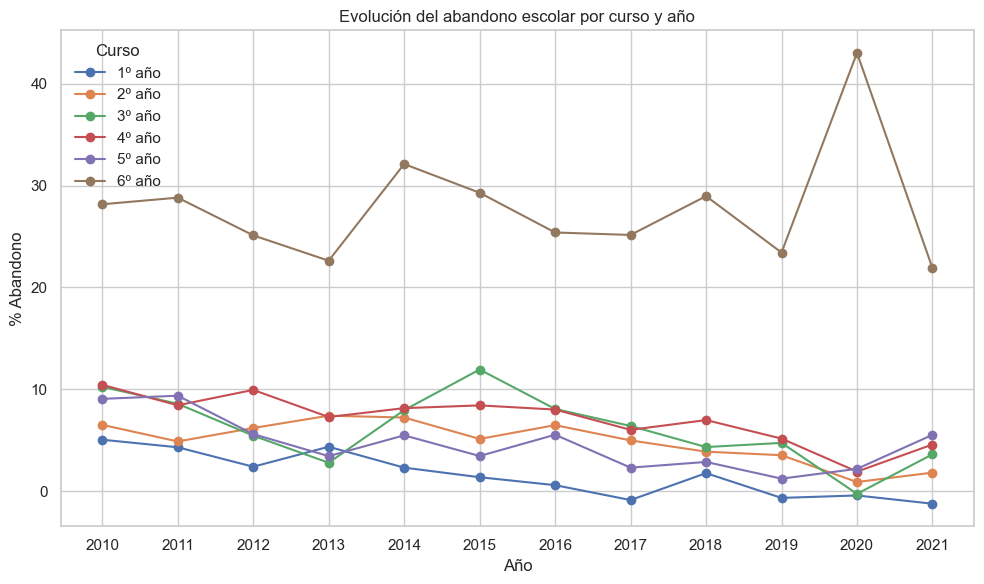

In [137]:
# Filtrar las columnas de abandono por curso
abandono_cols = [col for col in df_merged.columns if col.startswith("aband_") and "total" not in col.lower()]

# Crear un dataframe con año + columnas de abandono
abandono_por_anio = df_merged[["año"] + abandono_cols].copy()

# Reorganizar en formato largo (long format) para graficar fácilmente
df_cursos = abandono_por_anio.melt(
    id_vars="año", 
    var_name="curso", 
    value_name="abandono"
)

# Limpiar nombres de cursos (por ejemplo: "aband_1°" → "1º")
df_cursos["curso"] = df_cursos["curso"].str.replace("aband_", "").str.replace("°", "º")

# Graficar evolución del abandono por curso
plt.figure(figsize=(10,6))
for curso in sorted(df_cursos["curso"].unique()):
        datos = df_cursos[df_cursos["curso"] == curso]
        plt.plot(datos["año"], datos["abandono"], marker="o", label=f"{curso} año")

plt.title("Evolución del abandono escolar por curso y año")
plt.xlabel("Año")
plt.ylabel("% Abandono")
plt.legend(title="Curso")
plt.grid(True)
plt.tight_layout()
plt.show()


Este gráfico muestra la evolución del abandono escolar por curso entre los años 2010 y 2021. Se observa que el porcentaje de abandono es más alto en **6° año**, con picos significativos en años como 2014 y 2020.

Este fenómeno puede explicarse por factores como la cercanía a la salida del sistema escolar, incorporación al mercado laboral o desmotivación para concluir el nivel. El 6° año parece representar un punto de riesgo crítico en términos de permanencia.

> Esta tendencia sugiere la necesidad de políticas específicas para sostener a los estudiantes en la etapa final de su trayectoria educativa.


**Relación entre repitencia y abandono**

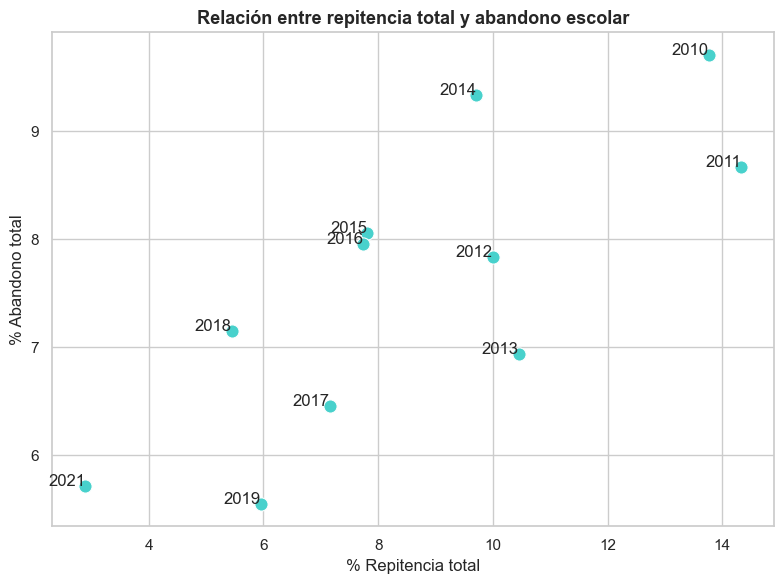

In [140]:
#Filtrar datos válidos
df_plot = df_merged[["año", "rep_total_pct", "aband_total_pct"]].dropna()

# Estilo uniforme
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook")

# Crear gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x="rep_total_pct", y="aband_total_pct", color="mediumturquoise", s=90)

# Etiquetas con el año
for i in df_plot.index:
    plt.text(
        df_plot.loc[i, "rep_total_pct"],
        df_plot.loc[i, "aband_total_pct"],
        str(df_plot.loc[i, "año"]),
        fontsize=12,
        ha="right"
    )

# Títulos y etiquetas
plt.title("Relación entre repitencia total y abandono escolar", fontsize=13, fontweight="bold")
plt.xlabel("% Repitencia total")
plt.ylabel("% Abandono total")
plt.grid(True)
plt.tight_layout()
plt.show()



Este gráfico muestra la relación entre el porcentaje total de repitencia y el abandono escolar, agregada por año.

Se evidencia una **tendencia creciente**: a mayor repitencia, mayor abandono. Años como 2010 y 2011 se destacan por tener ambos valores en niveles elevados, mientras que 2019 y 2021 reflejan mejoras en ambos indicadores.

> Esta visualización refuerza la hipótesis de que intervenir en la repitencia podría ser una vía eficaz para reducir el abandono escolar.


**Pairplot: Relación entre abandono escolar y niveles por año**

Este gráfico permite observar visualmente cómo se relacionan las matrículas por año y el abandono escolar total.

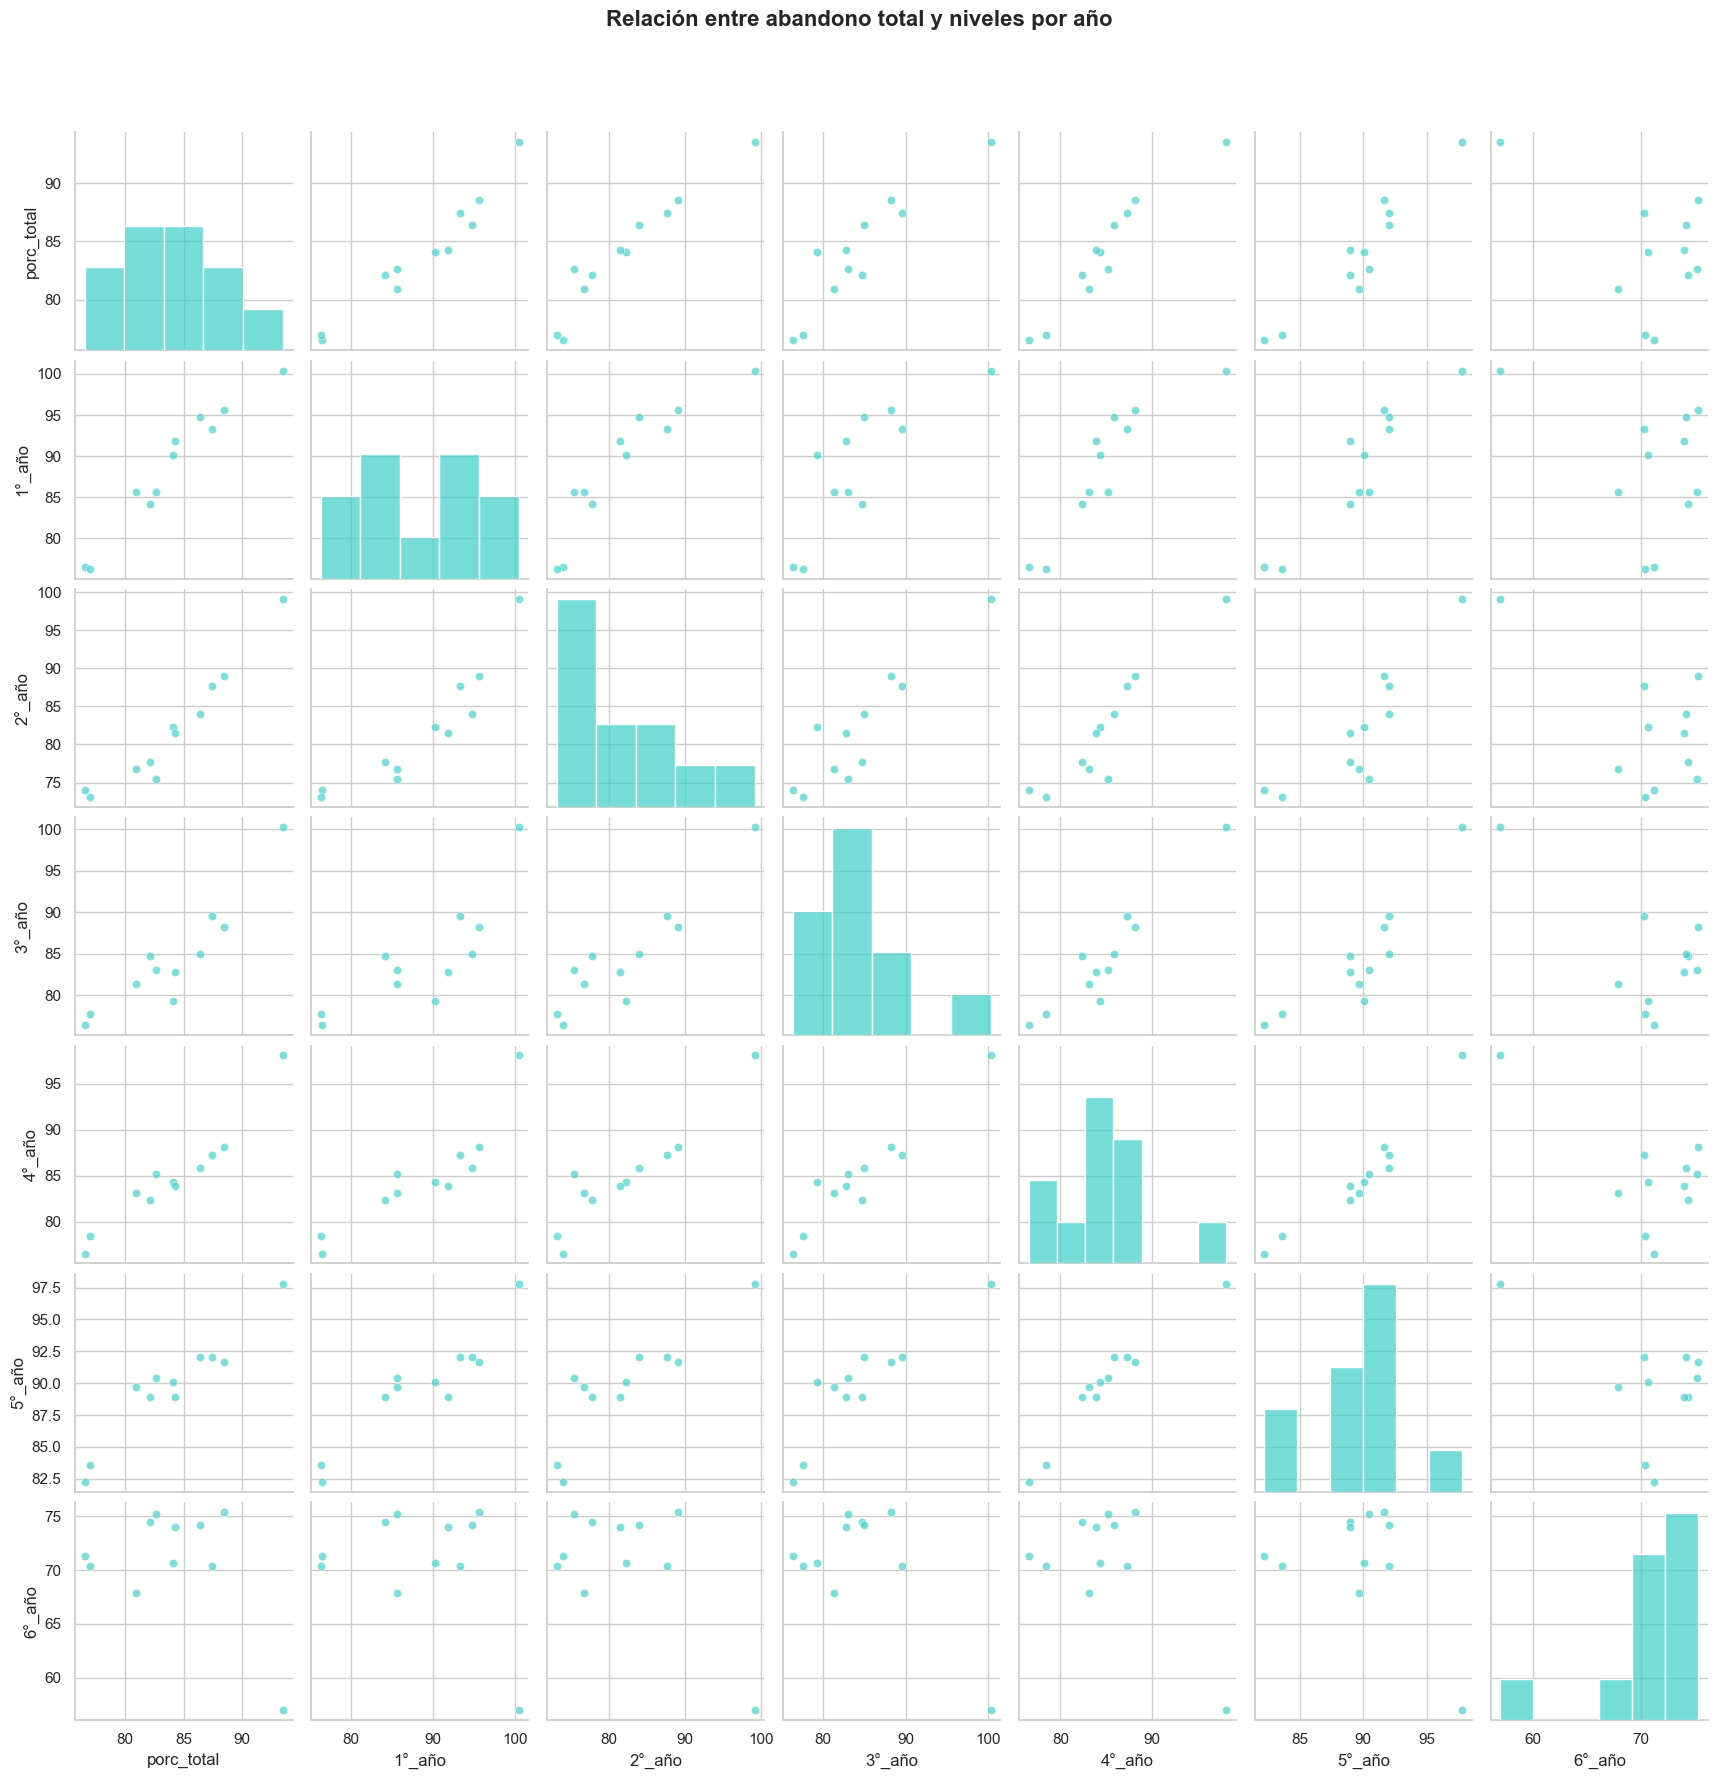

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables clave
vars_clave = ["porc_total", "1°_año", "2°_año", "3°_año", "4°_año", "5°_año", "6°_año"]

# Gráfico completo sin corner
g = sns.pairplot(
    df[vars_clave],
    corner=False,  # mostrar matriz completa
    plot_kws={"color": "mediumturquoise", "alpha": 0.7},
    diag_kws={"color": "mediumturquoise", "fill": True}
)

# Título general bien ubicado
g.fig.suptitle("Relación entre abandono total y niveles por año", y=1.02, fontsize=16, fontweight='bold')

# Ajuste de separación del título
g.fig.subplots_adjust(top=0.95)

plt.show()




Este gráfico muestra las relaciones entre el abandono total y el abandono por año de cursada (de 1° a 6° año).

Se observa que existe una **relación positiva moderada** entre el abandono total y los cursos intermedios, mientras que 1° y 6° año presentan comportamientos más variables. Esto puede indicar que en los extremos del ciclo (ingreso y egreso) influyen otros factores además de la trayectoria académica.

> Este análisis ayuda a identificar en qué niveles el abandono está más alineado con la tendencia general, lo cual puede orientar estrategias de intervención focalizadas.


**Heatmap de correlación**

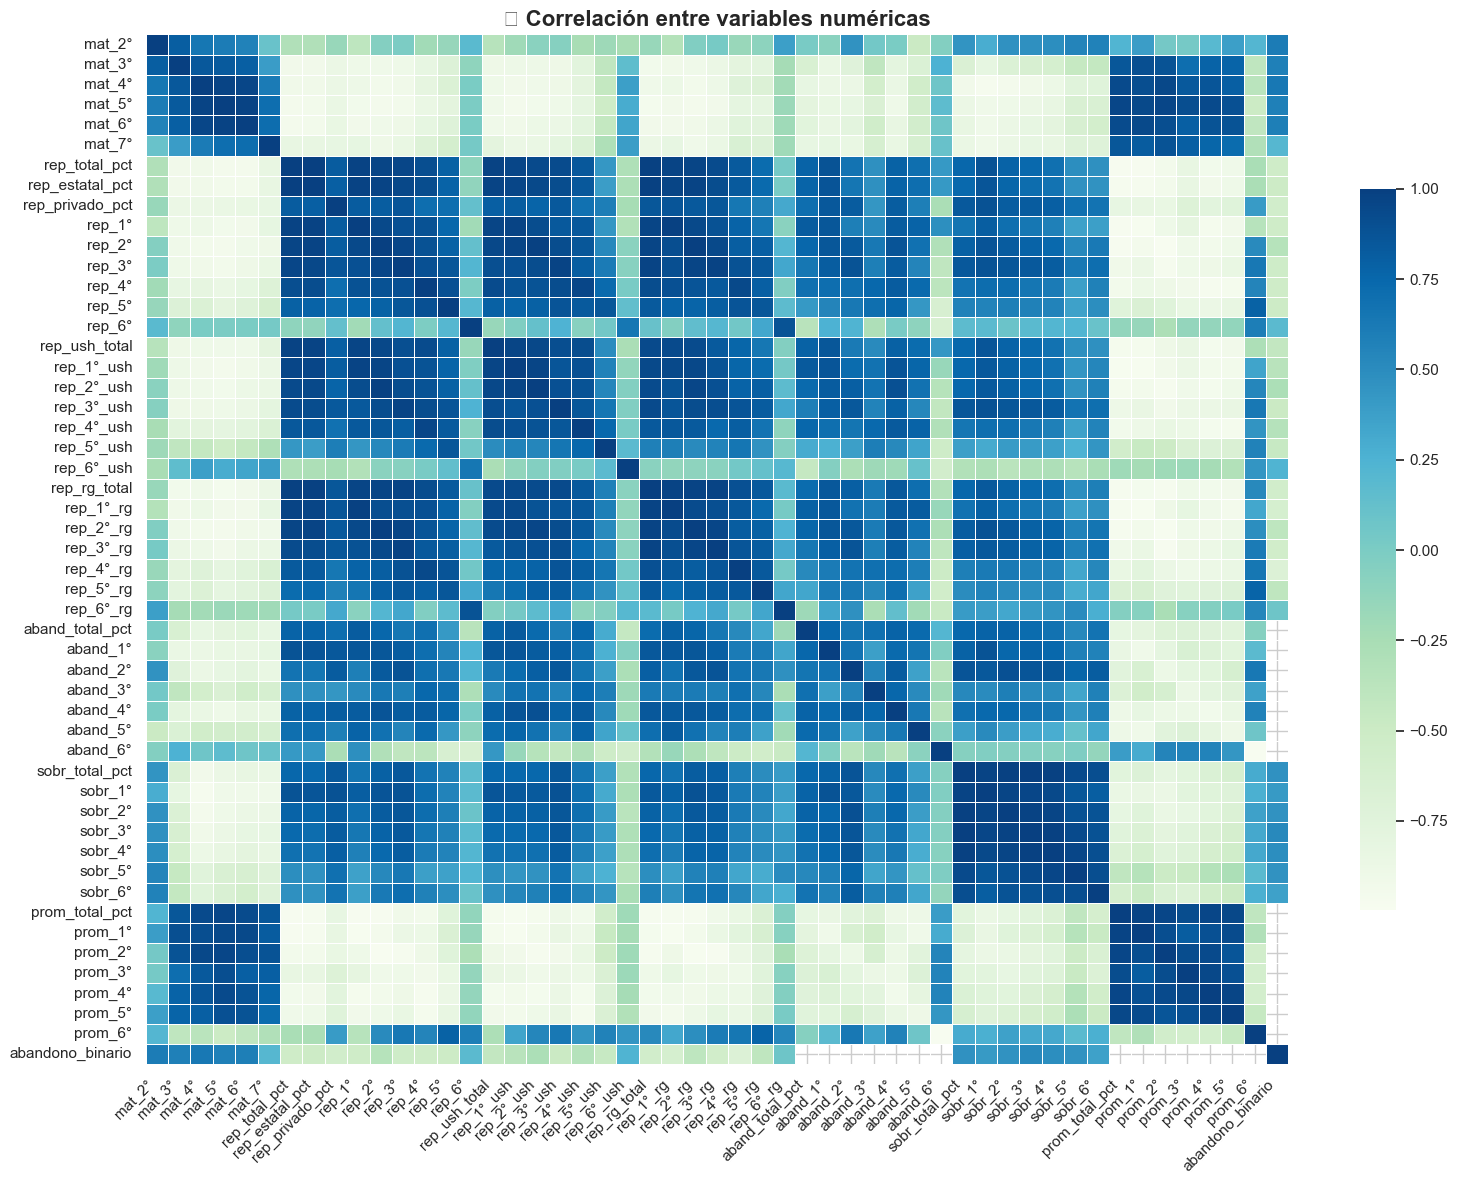

In [146]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(16, 12))  # Aumentamos el tamaño

sns.heatmap(
    df_merged.corr(numeric_only=True),
    cmap="GnBu",
    center=0,
    annot=False,  # podés poner True si querés los valores numéricos
    linewidths=0.6,
    linecolor='white',
    cbar_kws={"shrink": 0.7}
)

plt.title("🔗 Correlación entre variables numéricas", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Este gráfico muestra la correlación entre todas las variables numéricas del dataset. A partir de su análisis se pueden destacar varios patrones importantes:

 **Alta correlación positiva entre repitencia y abandono escolar**: las variables relacionadas con repitencia (como `rep_total_pct`, `rep_privado_pct`, `rep_1°`, `rep_2°`, etc.) presentan una relación fuerte con el porcentaje total de abandono y con la variable binaria de abandono. Esto sugiere que la repitencia es uno de los factores más relevantes a considerar en la predicción del abandono.

- **Correlación negativa entre promoción y abandono**: se observa que las tasas de promoción (`prom_total_pct`, `prom_1°`, `prom_3°`, etc.) tienen una relación inversa con el abandono. Es decir, a mayor promoción efectiva, menor probabilidad de abandono escolar.

- **Sobreedad como factor complementario**: las variables de sobreedad también están positivamente correlacionadas con el abandono, aunque con menor intensidad que las de repitencia.

- **Multicolinealidad esperable**: hay grupos de variables altamente correlacionadas entre sí, como las de matrícula por grado y total (`mat_*`), o las de repitencia por región y total. Este fenómeno es importante de considerar para evitar redundancia en los modelos predictivos.

> Este análisis es clave para seleccionar variables relevantes y descartar otras redundantes durante la etapa de modelado.


Text(0.5, 0, 'Porcentaje de abandono')

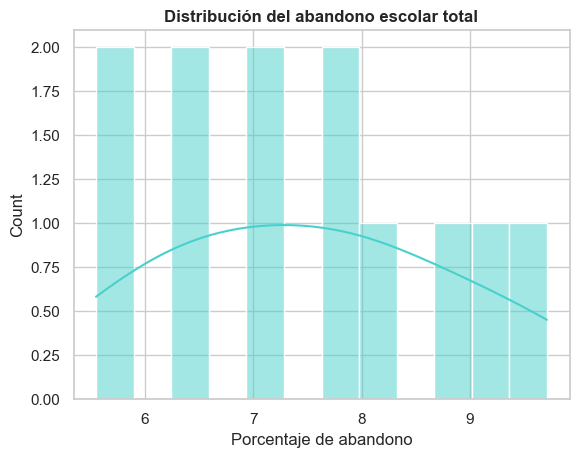

In [148]:
sns.histplot(df_merged["aband_total_pct"], kde=True, color="mediumturquoise", bins=12)
plt.title("Distribución del abandono escolar total", fontweight="bold")
plt.xlabel("Porcentaje de abandono")


Este histograma muestra la distribución del porcentaje de abandono escolar total en el período analizado. 

Se observa que los valores se concentran principalmente entre el 6.5% y el 8.5%, con una forma levemente sesgada hacia la izquierda. Esto sugiere que, si bien existen variaciones interanuales, el abandono escolar se mantiene dentro de un rango relativamente estable.

> Esta distribución justifica el uso de modelos de regresión y clasificación, ya que no se presentan valores extremos que distorsionen el análisis.


In [150]:
df_merged[["aband_total_pct", "rep_total_pct", "prom_total_pct", "sobr_total_pct"]].describe()


,aband_total_pct,rep_total_pct,prom_total_pct,sobr_total_pct
count,12.000000,13.000000,11.000000,13.000000
mean,7.492500,9.480000,83.943636,29.303077
std,1.340401,3.741221,4.969252,7.861822
min,5.550000,2.890000,76.530000,17.060000
25%,6.505000,7.160000,81.550000,23.920000
50%,7.495000,9.710000,84.070000,30.350000
75%,8.212500,13.380000,86.895000,33.200000
max,9.710000,14.610000,93.480000,41.060000


**Conclusiones del Análisis Exploratorio de Datos (EDA)**

El análisis exploratorio permitió comprender en profundidad las variables más relevantes del dataset y su relación con el abandono escolar. A partir de los gráficos y estadísticas analizadas, se destacan los siguientes puntos clave:

- **La repitencia escolar es el factor más fuertemente asociado al abandono**, especialmente en los primeros años de la secundaria.
- **La sobreedad también guarda una correlación positiva con el abandono**, aunque de menor magnitud que la repitencia.
- **La promoción efectiva se relaciona negativamente con el abandono**, confirmando que a mayor promoción, menor riesgo de deserción.
- Se observa **consistencia interna entre variables de un mismo tipo** (por ejemplo, repitencia por año y repitencia total), lo que indica posibles redundancias a considerar en el modelado.
- A través del análisis de correlación, se detecta cierta **multicolinealidad** entre variables similares, lo cual será tenido en cuenta para evitar sobreajuste.
- Las visualizaciones permiten confirmar que el abandono no es aleatorio: sigue patrones que pueden ser modelados.

> ✅ Este análisis justifica la selección de variables para los modelos predictivos y orienta la estrategia de limpieza, transformación e imputación de datos.



<div style="border-left: 4px solid #cccccc; padding-left: 12px; margin-top: 10px;">
  <h3 style="color: darkcyan;">Preparación del dataset para modelado</h3>
  <p style="color: dimgray;">
    En esta sección se consolida el dataset definitivo (`df_merged`) y se realizan los pasos clave para dejar los datos listos para entrenar modelos de aprendizaje automático:

- Se crea una **variable binaria (abandono_binario)** que clasifica los casos de abandono escolar alto (más del 5%) para un posterior analásis de clasifciación.
- Se eliminan filas con valores faltantes en la variable objetivo aband_total_pct.
- Se separan las variables independientes (X) de la variable dependiente (Y).
- Se crea un dataset limpio (df_model) eliminando observaciones con valores nulos en las variables predictoras.

Este dataset será utilizado para entrenar y evaluar distintos modelos de regresión y predicción.
  </p>
</div>



In [153]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# 1. Crear variable binaria (si no fue creada)
df_merged["abandono_binario"] = df_merged["aband_total_pct"].apply(
    lambda x: 1 if pd.notna(x) and x > 5 else 0
)

# 2. Seleccionar columnas predictoras (excepto variables objetivo y auxiliares)
columnas_predictoras = df_merged.drop(
    columns=["año", "aband_total_pct", "abandono_binario"]
).columns.tolist()

# 3. Crear dataset solo con filas que tengan abandono_binario definido
df_clasificacion = df_merged.dropna(subset=["abandono_binario"])

# 4. Separar X e y
X_bin = df_clasificacion[columnas_predictoras]
y_bin = df_clasificacion["abandono_binario"]

# 5. Detectar columnas por tipo
columnas_numericas = X_bin.select_dtypes(include=["number"]).columns.tolist()
columnas_categoricas = X_bin.select_dtypes(exclude=["number"]).columns.tolist()

# 6. Definir transformadores para cada tipo
transformador_numerico = SimpleImputer(strategy="mean")
transformador_categorico = SimpleImputer(strategy="most_frequent")

# 7. Crear transformador mixto
preprocesador = ColumnTransformer(
    transformers=[
        ("num", transformador_numerico, columnas_numericas),
        ("cat", transformador_categorico, columnas_categoricas),
    ]
)

# 8. Aplicar la imputación
X_bin_imputed_array = preprocesador.fit_transform(X_bin)

# 9. Reconstruir DataFrame imputado
X_bin_imputed = pd.DataFrame(
    X_bin_imputed_array,
    columns=columnas_numericas + columnas_categoricas
)

# 10. Confirmar distribución de clases
print("Distribución de clases conservadas:")
print(y_bin.value_counts())



Distribución de clases conservadas:
abandono_binario
1    12
0    11
Name: count, dtype: int64


In [154]:
# 1. Eliminar filas con NaNs en la variable objetivo
df_clean = df_merged.dropna(subset=["aband_total_pct"]).copy()

# Asegurar que la variable binaria sobreviva
if "abandono_binario" in df_merged.columns:
    df_clean["abandono_binario"] = df_merged["abandono_binario"]

# 2. Separar X (predictoras) e y (abandono continuo)
X = df_clean.drop(columns=["año", "aband_total_pct"])
y = df_clean["aband_total_pct"]

# 3. Eliminar filas con NaNs en las variables predictoras
df_model = df_clean.dropna(subset=X.columns.tolist())
X = df_model.drop(columns=["año", "aband_total_pct"])
y = df_model["aband_total_pct"]


# 5. **MODELADO PREDICTIVO (Regresión): ABANDONO ESCOLAR**

En esta sección se aplican algoritmos de Aprendizaje Automático supervisado para predecir el porcentaje de abandono escolar en Tierra del Fuego.

Se evalúan tres enfoques de regresión: Regresión Lineal, Árbol de decisioón y Random Forest Regressor. Estos modelos se entrenan utilizando las mismas variables predictoras, y se comparan en términos de rendimiento y capacidad de generalización.

<div style="border-left: 4px solid #cccccc; padding-left: 12px; margin-top: 10px;">

  <h3 style="color: darkcyan;">División de datos y selección de modelos</h3>
  <p style="color: dimgray;">
    Se dividen los datos en un conjunto de entrenamiento (70%) y otro de prueba (30%) para evaluar la capacidad de generalización de los modelos.
  </p>

</div>


In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<div style="border-left: 4px solid #cccccc; padding-left: 12px; margin-top: 10px;">

  <h3 style="color: darkcyan;">Entrenamiento y evaluación</h3>
  <p style="color: dimgray;">
    Se entrenan tres modelos distintos con los mismos datos de entrenamiento:
    Regresión Lineal, Árbol de Decisión y Random Forest Regressor.
    Luego, se evalúa su rendimiento en el conjunto de prueba utilizando tres métricas clave:
    R² (ajuste), MAE (error absoluto promedio) y RMSE (error cuadrático medio).
    Estas métricas permiten comparar el rendimiento relativo de cada modelo y determinar cuál se ajusta mejor al problema.
  </p>

</div>



In [159]:


# Crear los modelos
model_lr = LinearRegression()
model_tree = DecisionTreeRegressor(random_state=42)
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar los modelos
model_lr.fit(X_train, y_train)
model_tree.fit(X_train, y_train)
model_rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [160]:


# Lista de modelos entrenados
modelos = ["Reg. Lineal", "Árbol Decisión", "Random Forest"]
model_list = [model_lr, model_tree, model_rf]

# Calcular métricas
r2_scores = [r2_score(y_test, model.predict(X_test)) for model in model_list]
maes = [mean_absolute_error(y_test, model.predict(X_test)) for model in model_list]
rmses = [np.sqrt(mean_squared_error(y_test, model.predict(X_test))) for model in model_list]

# Crear DataFrame con los resultados
df_metrics = pd.DataFrame({
    "Modelo": modelos,
    "R²": r2_scores,
    "MAE": maes,
    "RMSE": rmses
})

# Mostrar la tabla ordenada por R²
display(df_metrics.sort_values("R²", ascending=False).round(3))


,Modelo,R²,MAE,RMSE
2,Random Forest,0.877,0.164,0.219
1,Árbol Decisión,-1.785,0.843,1.042
0,Reg. Lineal,-3.809,1.362,1.370


<div style="border-left: 4px solid #cccccc; padding-left: 12px; margin-top: 10px;">

  <h3 style="color: darkcyan;">Visualización de resultados</h3>
  <p style="color: dimgray;">
    Se grafican las predicciones del modelo Random Forest contra los valores reales, con una línea ideal como referencia. Esto permite visualizar la calidad del ajuste y detectar posibles desvíos sistemáticos.
  </p>

</div>


**Comparación de modelos**

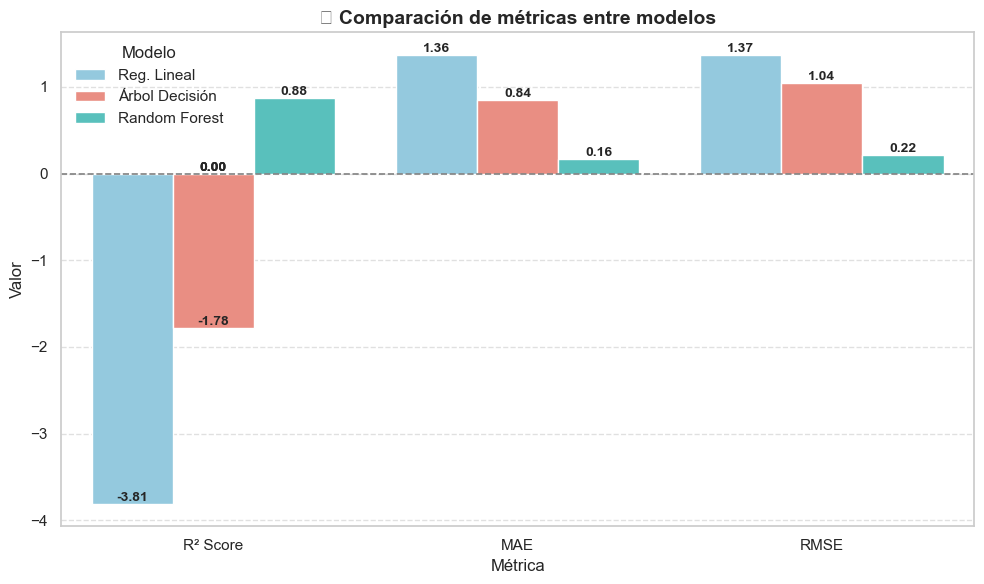

In [163]:
# Crear DataFrame
df_metrics = pd.DataFrame({
    "Modelo": modelos,
    "R² Score": r2_scores,
    "MAE": maes,
    "RMSE": rmses
})

# Preparar datos para gráfico
df_melted = df_metrics.melt(id_vars="Modelo", var_name="Métrica", value_name="Valor")

# Gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melted, x="Métrica", y="Valor", hue="Modelo", palette=["skyblue", "salmon", "mediumturquoise"])

# Añadir etiquetas numéricas a cada barra
for p in ax.patches:
    valor = p.get_height()
    ax.annotate(f'{valor:.2f}',
                (p.get_x() + p.get_width() / 2, valor),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

plt.title("📊 Comparación de métricas entre modelos", fontsize=14, fontweight="bold")
plt.ylabel("Valor")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
ax.axhline(0, color='gray', linestyle='--', linewidth=1.2)
plt.tight_layout()
plt.show()



**Tasas predichas vs valores reales**

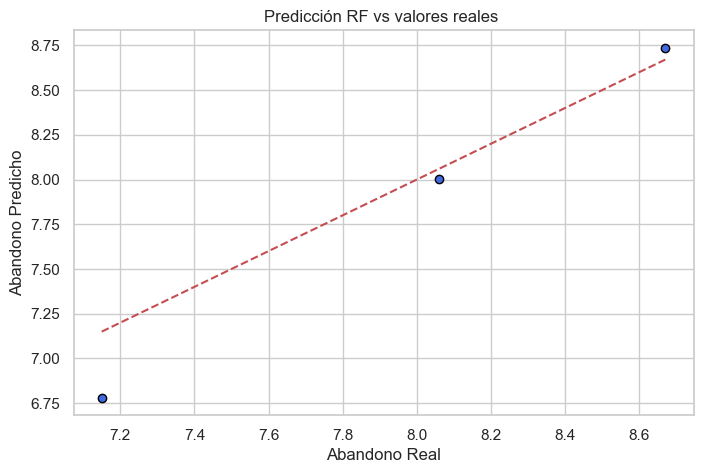

In [165]:
y_pred = model_rf.predict(X_test)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color="royalblue", edgecolor="black")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel("Abandono Real")
plt.ylabel("Abandono Predicho")
plt.title("Predicción RF vs valores reales ")
plt.grid(True)
plt.show()


**Predicción del abandono escolar por año**


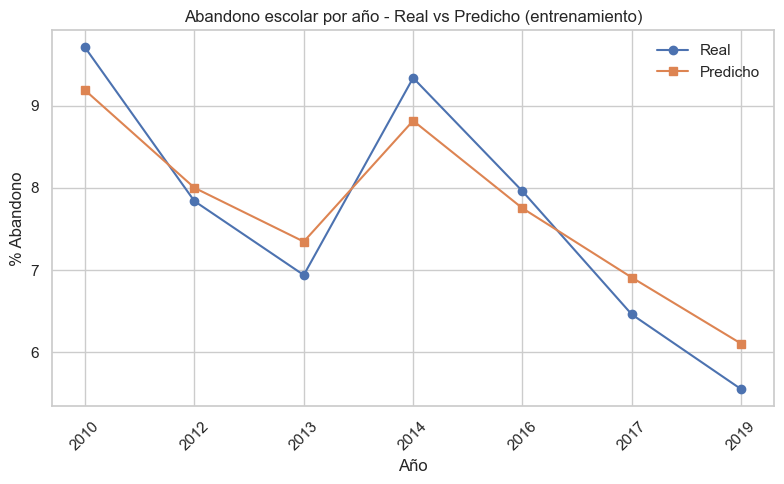

In [167]:
# ✅ Recuperar índices del conjunto de entrenamiento
train_indices = X_train.index

# ✅ Armar DataFrame con año, valor real y predicho
resultados = df_model.loc[train_indices, ["año"]].copy()
resultados["Real"] = y_train.values
resultados["Predicho"] = model_rf.predict(X_train)

# ✅ Graficar evolución por año
resultados.sort_values("año", inplace=True)

plt.figure(figsize=(8,5))
plt.plot(resultados["año"], resultados["Real"], label="Real", marker="o")
plt.plot(resultados["año"], resultados["Predicho"], label="Predicho", marker="s")
plt.title("Abandono escolar por año - Real vs Predicho (entrenamiento)")
plt.xlabel("Año")
plt.ylabel("% Abandono")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Mapa de calor de correlaciones entre variables numéricas**

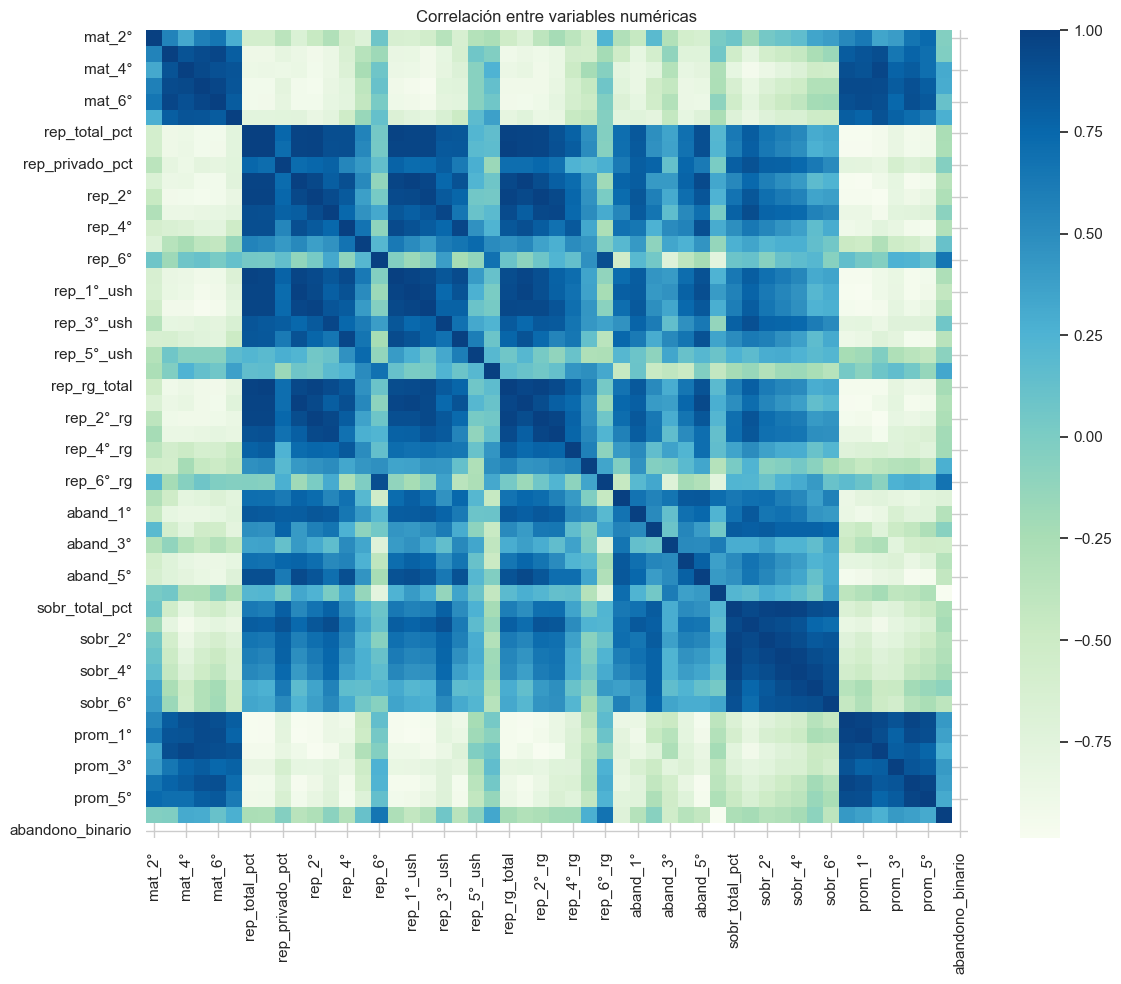

In [169]:

plt.figure(figsize=(12,10))
sns.heatmap(df_model.corr(numeric_only=True), cmap="GnBu", annot=False)
plt.title("Correlación entre variables numéricas")
plt.tight_layout()
plt.show()


**Variables mas relevantes para RF**

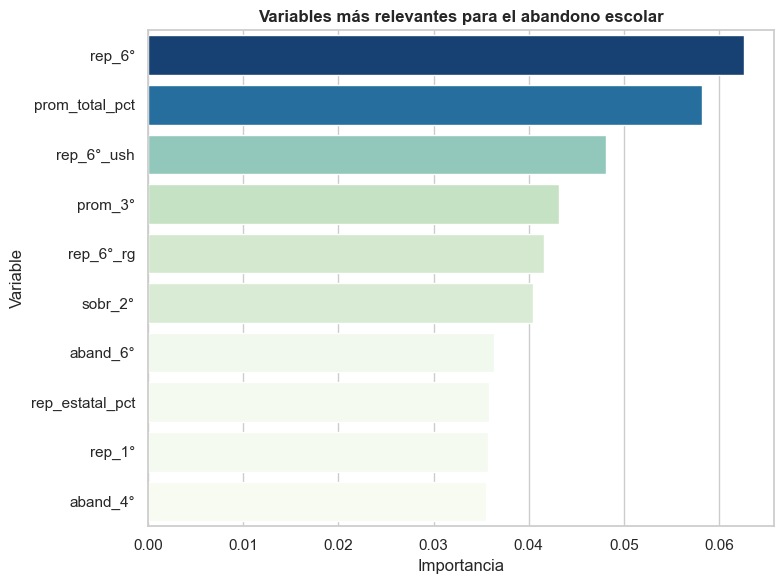

In [178]:
# Crear el DataFrame de importancias (si no lo habías creado antes)
importancia = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": model_rf.feature_importances_
})

# Ordenar top 10
importancia_top10 = importancia.sort_values(by="Importancia", ascending=False).head(10)

# Normalizar para mapear importancia a color
norm = Normalize(vmin=importancia_top10["Importancia"].min(), vmax=importancia_top10["Importancia"].max())
cmap = cm.get_cmap("GnBu")  # podés probar otros como "viridis", "crest"
colores = [cmap(norm(val)) for val in importancia_top10["Importancia"]]

# Graficar
plt.figure(figsize=(8, 6))
sns.barplot(
    data=importancia_top10,
    x="Importancia",
    y="Variable",
    palette=colores
)
plt.title("Variables más relevantes para el abandono escolar", fontweight="bold")
plt.tight_layout()
plt.show()



<div style="border-left: 4px solid #cccccc; padding-left: 12px; margin-top: 10px;">

  <h3 style="color: darkcyan;">Conclusión del modelado</h3>

  <p style="color: dimgray;">
    Se compararon tres modelos de regresión supervisada —Regresión Lineal, Árbol de Decisión y Random Forest— para predecir el porcentaje de abandono escolar. 
    La evaluación se realizó sobre un conjunto de prueba mediante las métricas:
  </p>

  <ul style="color: dimgray;">
    <li><strong>R² Score</strong>: 0.877</li>
    <li><strong>MAE (Error Absoluto Medio)</strong>: 0.164</li>
    <li><strong>RMSE (Raíz del Error Cuadrático Medio)</strong>: 0.219</li>
  </ul>

  <p style="color: dimgray;">
    Estas cifras demuestran que el modelo Random Forest logró el mejor ajuste, con errores bajos y consistentes, mostrando una buena capacidad para generalizar. Esta conclusión se ve reforzada por los gráficos generados:
  </p>

  <ul style="color: dimgray;">
    <li>El gráfico de predicción vs. valores reales muestra un alineamiento fuerte entre las predicciones y los datos observados.</li>
    <li>La comparación por año en el conjunto de entrenamiento revela que el modelo replica adecuadamente las subidas y bajadas reales.</li>
    <li>El heatmap de correlaciones permite identificar variables con alta asociación al abandono, especialmente aquellas ligadas a repitencia y promoción.</li>
    <li>El gráfico de métricas cuantitativas confirmó que Random Forest supera a los otros dos modelos evaluados.</li>
    <li>El análisis de importancia de variables destaca como factores más influyentes a rep_6°, prom_total_pct, rep_6°_ush y prom_3°, lo que coincide con patrones detectados en el análisis exploratorio.</li>
  </ul>

  <p style="color: dimgray;">
    En función de estos resultados y visualizaciones, se seleccionó el modelo Random Forest como herramienta final para proyectar el abandono escolar en los años futuros y generar conclusiones educativas fundamentadas.
  </p>

</div>



# 6. **MODELADO PREDICTIVO (Clasificación): ABANDONO ESCOLAR**


<p style="margin-top: 10px;">
  En esta sección se busca predecir si el abandono escolar será alto(&gt;5%) o bajo (&le;5%) mediante un enfoque de clasificación binaria.
  Para ello, se utiliza la variable abandono_binario, creada a partir del porcentaje de abandono observado.
</p>

<div style="border-left: 4px solid #cccccc; padding-left: 12px; margin-top: 10px;">
  <h3 style="color: darkcyan;">Entrenamiento y evaluación</h3>
  <p style="color: dimgray;">
    Se entrenan tres modelos de clasificación utilizando las mismas variables predictoras que en el modelado de regresión.
  </p>

  <ul style="color: dimgray;">
    <li>Regresión Logística</li>
    <li>Árbol de Decisión</li>
    <li>Random Forest Classifier</li>
  </ul>

  <p style="color: dimgray;">
    El rendimiento de los modelos se evalúa mediante métricas propias de clasificación binaria:
  </p>

  <ul style="color: dimgray;">
    <li><strong>Accuracy</strong>: proporción de predicciones correctas</li>
    <li><strong>Precision</strong>: proporción de positivos predichos que son realmente positivos</li>
    <li><strong>Recall</strong>: proporción de positivos reales correctamente identificados</li>
    <li><strong>F1-score</strong>: promedio armónico entre precision y recall</li>
    <li><strong>Matriz de confusión</strong>: visualización del rendimiento del clasificador</li>
  </ul>

  <p style="color: dimgray;">
    Estas métricas permiten comparar objetivamente la capacidad de cada modelo para clasificar correctamente los casos de abandono alto y bajo.
  </p>
</div>




,Accuracy,Precision,Recall,F1
Logistic Regression,1.0,1.0,1.0,1.0
Decision Tree,1.0,1.0,1.0,1.0
Random Forest,1.0,1.0,1.0,1.0


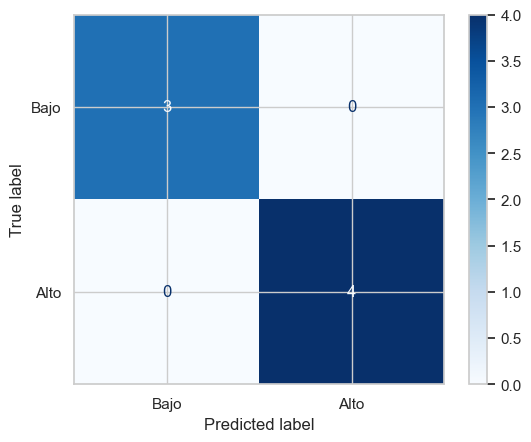

In [180]:
# 1. Variables predictoras e y (usamos todas las columnas originales definidas como X)
X_bin = df_merged[X.columns]
y_bin = df_merged["abandono_binario"]

# 2. Filtrar solo columnas numéricas
X_bin = X_bin.select_dtypes(include=["number"])

# 3. Separar en entrenamiento y test
X_train_bin, X_test_bin, y_bin_train, y_bin_test = train_test_split(
    X_bin, y_bin, test_size=0.3, random_state=42, stratify=y_bin
)

# 4. Imputar NaN con la media
imputer = SimpleImputer(strategy="mean")
X_train_bin = imputer.fit_transform(X_train_bin)
X_test_bin = imputer.transform(X_test_bin)

# 5. Entrenar modelos
model_log = LogisticRegression(max_iter=1000, random_state=42)
model_tree = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42)

model_log.fit(X_train_bin, y_bin_train)
model_tree.fit(X_train_bin, y_bin_train)
model_rf.fit(X_train_bin, y_bin_train)

# 6. Predicciones
pred_log = model_log.predict(X_test_bin)
pred_tree = model_tree.predict(X_test_bin)
pred_rf = model_rf.predict(X_test_bin)

# 7. Métricas
def obtener_metricas(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1": f1_score(y_true, y_pred, zero_division=0)
    }

resultados = {
    "Logistic Regression": obtener_metricas(y_bin_test, pred_log),
    "Decision Tree": obtener_metricas(y_bin_test, pred_tree),
    "Random Forest": obtener_metricas(y_bin_test, pred_rf)
}

# 8. Mostrar tabla de resultados
df_clf_metrics = pd.DataFrame(resultados).T.round(3)
display(df_clf_metrics)

# 9. Matriz de confusión del mejor modelo
ConfusionMatrixDisplay.from_predictions(
    y_bin_test, pred_rf, display_labels=["Bajo", "Alto"], cmap="Blues"
)



<div style="border-left: 4px solid #cccccc; padding-left: 12px; margin-top: 10px;">

  <h3 style="color: darkcyan;">Evaluación con validación cruzada</h3>
  <p style="color: dimgray;">
    Para estimar la capacidad real de generalización de los modelos de clasificación, se aplicó un procedimiento de <strong>validación cruzada con 5 folds</strong> sobre el conjunto completo de datos imputado.
  </p>
  <p style="color: dimgray;">
    Se utilizó como métrica principal el <strong>F1-score</strong>, que combina precisión y recall. Esta métrica es especialmente útil cuando se trabaja con clases desbalanceadas o con conjuntos de datos reducidos.
  </p>
  <p style="color: dimgray;">
    Este procedimiento permite detectar posibles casos de <strong>sobreajuste</strong> (overfitting), ya que evalúa el rendimiento del modelo en distintas particiones de los datos, sin depender de una única división entrenamiento/test.
  </p>

</div>


In [182]:

# Modelos ya definidos
model_log = LogisticRegression(max_iter=1000, random_state=42)
model_tree = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42)

# Filtro para variables numéricas
X_bin = df_merged[X.columns].select_dtypes(include=["number"])
y_bin = df_merged["abandono_binario"]

# Imputación completa (antes del CV)
imputer = SimpleImputer(strategy="mean")
X_bin_imputado = imputer.fit_transform(X_bin)

# Calcular F1-score promedio por validación cruzada
f1_log = cross_val_score(model_log, X_bin_imputado, y_bin, cv=5, scoring="f1").mean()
f1_tree = cross_val_score(model_tree, X_bin_imputado, y_bin, cv=5, scoring="f1").mean()
f1_rf = cross_val_score(model_rf, X_bin_imputado, y_bin, cv=5, scoring="f1").mean()

# Mostrar resultados
print("F1-score promedio (Validación cruzada - 5 folds):")
print(f"Regresión Logística: {f1_log:.3f}")
print(f"Árbol de Decisión:   {f1_tree:.3f}")
print(f"Random Forest:       {f1_rf:.3f}")


F1-score promedio (Validación cruzada - 5 folds):
Regresión Logística: 0.853
Árbol de Decisión:   1.000
Random Forest:       0.933


<div style="border-left: 4px solid #cccccc; padding-left: 12px; margin-top: 10px;">

  <h3 style="color: darkcyan;">Conclusión del modelo de clasificación y validación cruzada</h3>

  <p style="color: dimgray;">
    Se entrenaron tres modelos de clasificación para predecir si el abandono escolar sería alto (&gt;5%) o bajo (&le;5%) utilizando la variable abandono_binario. Los modelos evaluados fueron: Regresión Logística, Árbol de Decisión y Random Forest.
  </p>

  <p style="color: dimgray;">
    Las métricas obtenidas en el conjunto de prueba indicaban un rendimiento elevado para los tres modelos. Para validar si estos resultados reflejan una buena generalización o un posible sobreentrenamiento, se aplicó una validación cruzada con 5 folds utilizando el F1-score como métrica principal.
  </p>

  <p style="color: dimgray;">Los resultados promedio fueron:</p>
  <ul style="color: dimgray;">
    <li>Árbol de Decisión: F1 = 1.000</li>
    <li>Random Forest: F1 = 0.933</li>
    <li>Regresión Logística: F1 = 0.853</li>
  </ul>

  <p style="color: dimgray;">
    Aunque estos valores podrían sugerir un desempeño excelente, el caso del Árbol de Decisión —que obtuvo un F1 perfecto— es una señal de posible sobreentrenamiento, especialmente dado el tamaño reducido del dataset. Esto significa que el modelo podría estar ajustándose demasiado a los datos de entrenamiento, sin generalizar correctamente ante nuevos casos.
  </p>

  <p style="color: dimgray;">
    Random Forest, al ser un modelo de ensamblado, mitiga parcialmente este riesgo, aunque también mostró un rendimiento muy alto. La Regresión Logística, al ser más simple y menos propensa al sobreajuste, podría ofrecer una estimación más realista del rendimiento esperable en producción.
  </p>


</div>



# 7. **Conclusión**


Este proyecto tuvo como objetivo analizar el fenómeno del abandono escolar en la educación secundaria de Tierra del Fuego a partir de datos oficiales, utilizando técnicas de aprendizaje automático y análisis exploratorio de datos. Se trabajó con tres fuentes principales —matrícula, repitencia y promoción/abandono— que fueron limpiadas, reorganizadas y unificadas para construir un dataset coherente y utilizable.

El análisis exploratorio permitió identificar patrones claros: el abandono escolar tiende a incrementarse en los cursos superiores y guarda una fuerte relación con la repitencia. También se observaron vínculos significativos con la sobreedad y la promoción efectiva, lo que justificó su inclusión como variables predictoras.

Se implementaron modelos de regresión (lineal, árbol de decisión y Random Forest) para predecir el porcentaje de abandono. Random Forest mostró el mejor desempeño general, superando a los modelos más simples tanto en precisión como en estabilidad. Además, se aplicaron modelos de clasificación sobre una versión binarizada del abandono para detectar niveles críticos. Si bien el árbol de decisión alcanzó una F1 perfecta, este resultado sugiere sobreajuste, mientras que el modelo de Random Forest logró un equilibrio más realista entre sensibilidad y precisión.

Este trabajo demuestra el valor de los modelos aplicados como herramientas de análisis que pueden orientar decisiones educativas basadas en evidencia, permitiendo actuar en áreas específicas que permitan una mejora en los patrones de abandono escolar. 

Este proyecto representa un primer paso en la incorporación de técnicas de ciencia de datos al estudio de problemáticas educativas. A futuro, incorporar variables socioeconómicas, aumentar la cantidad de años analizados y generar proyecciones reales permitiría ampliar el alcance y profundidad del análisis, con el objetivo de contribuir al diseño de políticas públicas más efectivas y focalizadas.
